<a href="https://colab.research.google.com/github/Kekkles1/BI-Colab/blob/main/data_profiling_assig_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BI ASSIGNMENT

(Fatima Mahmood

Zara Kashif)

# Understanding the Data

This data is about two hotels named 'Resort Hotel' and 'City Hotel' in which information related to their bookings is given. This booking data consists of their cancellations, time that a customer takes from reserving a room till their arrival at the hotel, the arrival dates, customers that stay in on weekend or week nights, the customer group consists of how many adults, children and babies, what is the customers meal choice, what country do they belong to, what was their booking channel and through what source did they book the room.

**Business Understanding:**
The business has two hotels: Resort Hotel and City Hotel. The main business process is booking the hotels. From a business perspective, the hotel wants to maximize its bookings to maximize revenue. From a BI perspective, we want to understand

The data provides key metrics regarding customers, booking patterns. For the customers category, there is data regarding their age, location and market segmentation. This will allow a deep profile of the customers to be built. For booking patterns, we can observe the lead_time, cancellation tendencies, room types and so forth.

**Problem Statement:**
How many customers is the business retaining? What are the types of customers they're retaining (demographic, room-bookings). How can the business improve its retention rate?

**Queries:**
Which distribution gets you the most most customers of what market segment.
Find the number of repeat guests

**Dimensions and Facts Within the Data**

**Dimensions:**
*   Hotel
*   Is Cancelled
*   Arrival dates
*   Meal
*   Country
*   Market Segment
*   Distribution Channel
*   Reserved Room Type
*   Assigned Room Type
*   Is Repeated Guest
*   Previous Cancellations
*   Company
*   Agent
*   Deposit Type
*   Customer Type
*   Reservation Status


**Facts:**


*   Lead Time
*   Stays in weekends & nights
*   Adults
*   Children
*   Babies
*   Booking Changes
*   Days in Waiting List
*   ADR
*   Required car parking spaces
*   Total of special requests

**Important Facts and Dimensions**

The important facts are: ADR, Adults, Children, Babies and Lead Time.

The important dimensions are: Hotel, Country, Customer Type, Is Repeated Guest, Market Segment, Distribution Channel and Arrival Dates (Time).


**Proof**
Yes, the Is Repeated Guest column can solve our given problem statement as we can use it to figure out how many of the hotels customers are new or repeat guests.

# Descriptive Statistics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as mano

In [ ]:
# Setting styles - You can skip this, this will add gridlines for better readability.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
file_path = '/content/drive/MyDrive/hotel_bookings_dirty.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,NaN,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,NaN,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,NaN,Transient,0.0,0.0,0.0,Check-Out,07/01/2015
2,Resort Hotel,0.0,7.0,2015.0,July,NaN,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,NaN,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,NaN,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,NaN,Transient,98.0,0.0,1.0,Check-Out,03/07/2015


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119378.000000,111018.000000,119376.000000,29845.000000,119374.000000,119377.000000,119375.000000,107437.000000,111016.000000,119375.000000,119377.000000,119377.000000,119376.000000,95503.000000,103038.000000,6795.000000,29847.000000,119377.000000,119374.000000,119373.000000
mean,0.370420,104.114801,2016.156991,27.186899,15.798465,0.927624,2.500323,1.856521,0.103778,0.007950,0.031916,0.087127,0.137113,0.221124,86.691793,189.286976,2.215901,101.830816,0.062526,0.571385
std,0.482919,106.808051,0.710801,13.527545,8.780895,0.998636,1.908340,0.565173,0.398386,0.097442,0.175776,0.844382,1.497524,0.652867,110.772042,131.665904,17.009015,50.537010,0.245307,0.792820
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.250000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2027.000000,53.000000,31.000000,19.000000,50.000000,50.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.dtypes

,0
hotel,object
is_canceled,float64
lead_time,float64
arrival_date_year,float64
arrival_date_month,object
arrival_date_week_number,float64
arrival_date_day_of_month,float64
stays_in_weekend_nights,float64
stays_in_week_nights,float64
adults,float64


In [ ]:
numerical_cols = df.select_dtypes(include=['float64']).columns
print(numerical_cols)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')


## Numerical Data Analysis

>Lead Time :


In [ ]:
df['lead_time'].describe()

,lead_time
count,111018.000000
mean,104.114801
std,106.808051
min,0.000000
25%,18.000000
50%,69.000000
75%,160.000000
max,737.000000


In [ ]:
print("Median: ", df['lead_time'].median())

Median:  69.0


<Axes: xlabel='lead_time', ylabel='Count'>

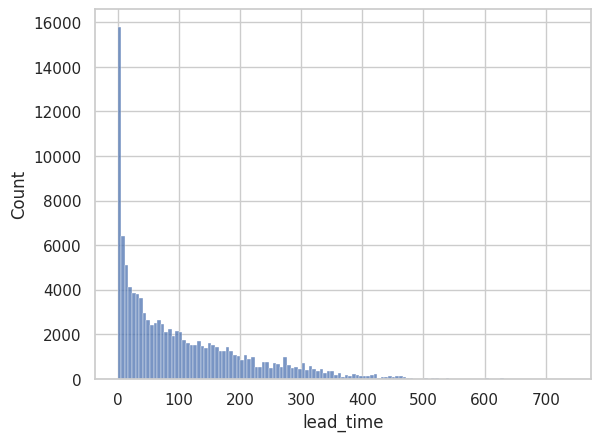

In [ ]:
sns.histplot(df["lead_time"])

<Axes: xlabel='lead_time'>

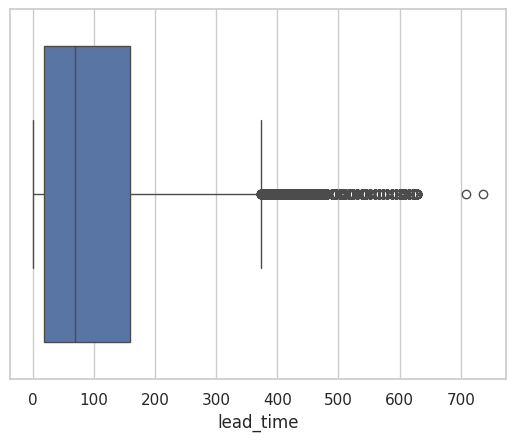

In [ ]:
sns.boxplot(x=df['lead_time'])

**Insights**
Lead Time is the amount of time between a customer's reservation date and check-in date so it lets us know how far in advanced a customer books their hotel. This is an important metric as it can let operations pre-plan, the hotel can charge according to the lead time that is if there is a short lead time the customer can be priced higher as there is a greater need from the guests side. Also, it gives insights into which time period would be of high demand for the hotel. For example, people often book hotels for the summer/winter vacations in advance as they are aware that there will be a much greater demand then and thus prices will be higher so its better to book earlier so you can avoid those extra expenses.

For the given data, we notice a very large difference between the mean and median. The mean is 104 while the median is 69. Mean is impacted by outliers so we can assume that there a number of outliers in the data which is affecting the mean. This is supported by the given boxplot which shows a number of outliers in the data (from lead_time 400 onwards). The boxplot is positive-skewed i.e the mean is greater than the median (which is supported by our calculations).



> Stays in Weekends Night :



In [ ]:
df['stays_in_weekend_nights'].describe()

,stays_in_weekend_nights
count,119377.000000
mean,0.927624
std,0.998636
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,19.000000


In [ ]:
print("Median: ", df['stays_in_weekend_nights'].median())

Median:  1.0


<Axes: xlabel='stays_in_weekend_nights', ylabel='Count'>

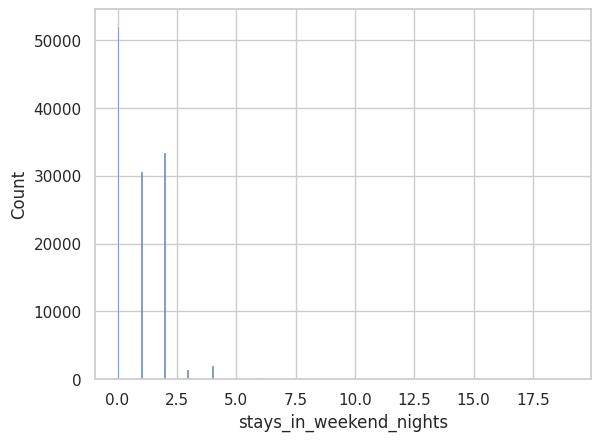

In [ ]:
sns.histplot(df["stays_in_weekend_nights"])

<Axes: xlabel='stays_in_weekend_nights'>

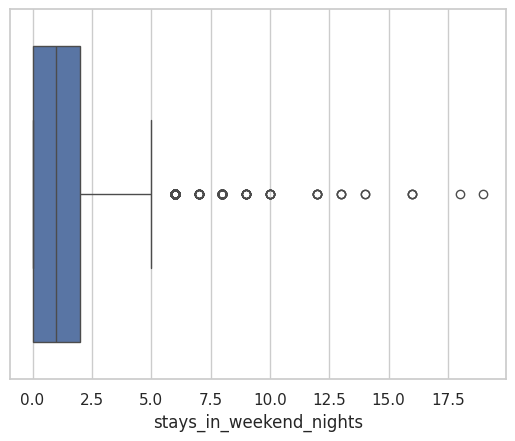

In [ ]:
sns.boxplot(x=df['stays_in_weekend_nights'])

**Insights**
This metric tells us the number of weekend nights customers are staying which is important as weekend nights tend to be the busiest and most profitable times for a hotel but we need to see if the rest of our data supports this idea. The mean and median are very similar so we can deduce there are not many outliers in the data. Due to the standard deviation being almost 1, we can say that the data is not highly skewed (symmetric). We can deduce that customers on average spend 1 weekend night in the hotel so these customers are probably not here for very long trips but short ones instead.



>Stays in Week Nights :



In [ ]:
df['stays_in_week_nights'].describe()

,stays_in_week_nights
count,119375.000000
mean,2.500323
std,1.908340
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,50.000000


In [ ]:
print("Median: ", df['stays_in_week_nights'].median())

Median:  2.0


<Axes: xlabel='stays_in_week_nights', ylabel='Count'>

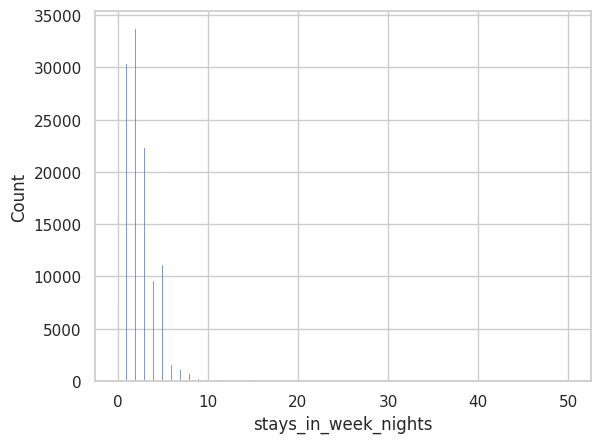

In [ ]:
sns.histplot(df["stays_in_week_nights"])

<Axes: xlabel='stays_in_week_nights'>

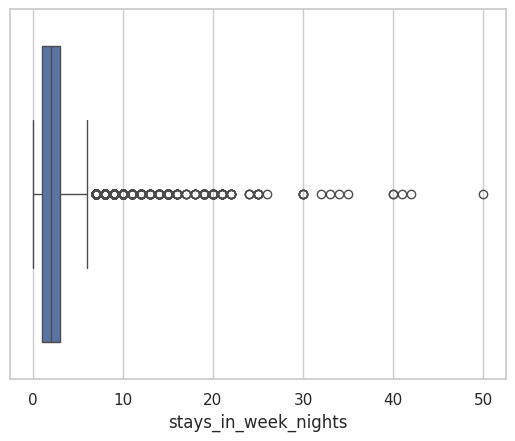

In [ ]:
sns.boxplot(x=df['stays_in_week_nights'])

**Insights**
This metric tells us how many weekdays guests spend at the hotel. Normally, office workers spend weekdays at hotels. The mean is 2.5 and median is 2 so they're quite similar with standard deviation being almost 2. Similar to the styas_in_weekend_nights data, this data is not highly skewed (symmetric) but interestingly enough, customers tend to spend 2 weekdays at the hotel which is a day more than the time guests were spending over the weekends.



>Adults :



In [ ]:
df['adults'].describe()

,adults
count,107437.000000
mean,1.856521
std,0.565173
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,50.000000


In [ ]:
print("Median: ", df['adults'].median())

Median:  2.0


<Axes: xlabel='adults', ylabel='Count'>

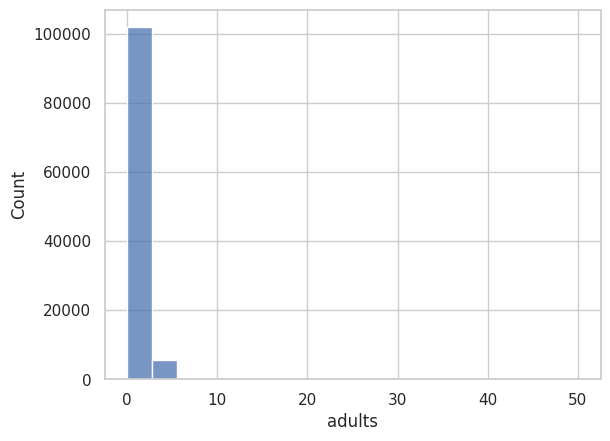

In [ ]:
sns.histplot(df["adults"])

<Axes: xlabel='adults'>

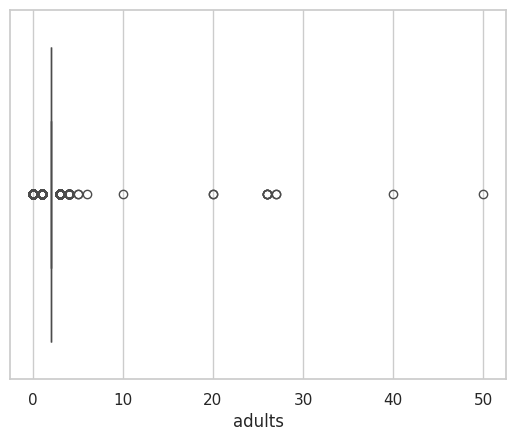

In [ ]:
sns.boxplot(x=df['adults'])

**Insights**
This metric gives us insights into our customer segment. We can deduce that on average, 2 adults spend time at the hotel. This means our customer segment is either a couple or potentially a family.



> Children :



In [ ]:
df['children'].describe()

,children
count,111016.000000
mean,0.103778
std,0.398386
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,10.000000


In [ ]:
print("Median: ", df['children'].median())

Median:  0.0


<Axes: xlabel='children', ylabel='Count'>

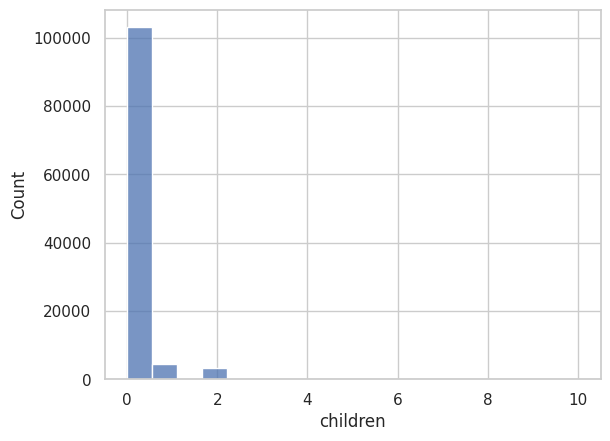

In [ ]:
sns.histplot(df["children"])

<Axes: xlabel='children'>

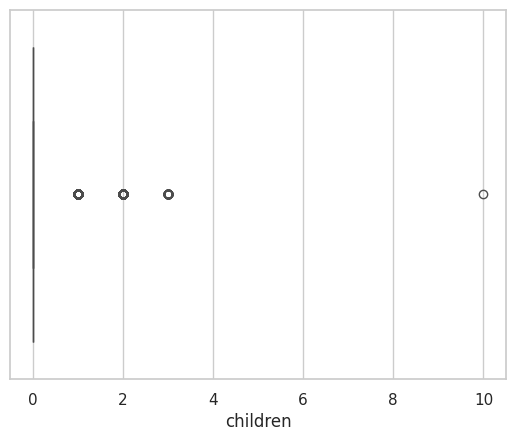

In [ ]:
sns.boxplot(x=df['children'])

**Insights**
This metric gives insight into the customer segment. We saw previously that the guests tend to be 2 adults so they could either be couples or a family. The median coming as 0 indicates that it is more likely the guests staying at the hotel are child-free (so probably not families).



>Babies :



In [ ]:
df['babies'].describe()

,babies
count,119375.000000
mean,0.007950
std,0.097442
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,10.000000


In [ ]:
print("Median: ", df['babies'].median())

Median:  0.0


<Axes: xlabel='babies', ylabel='Count'>

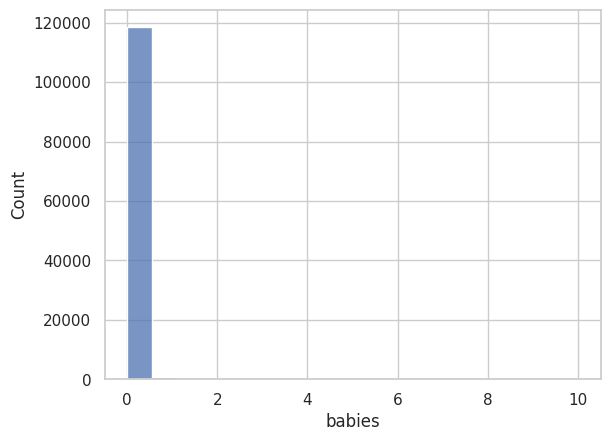

In [ ]:
sns.histplot(df["babies"])

<Axes: xlabel='babies'>

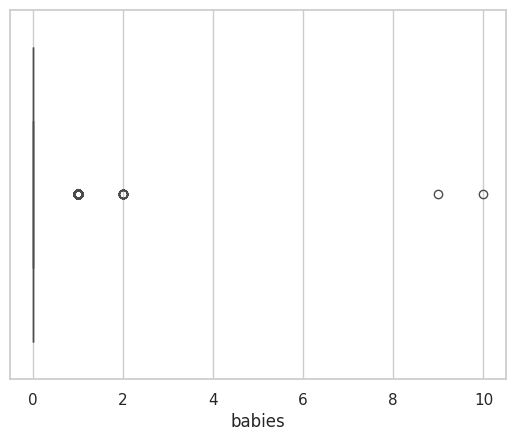

In [ ]:
sns.boxplot(x=df['babies'])

**Inights**
This metric gives further insight into the customer segment and solidifies our previous deductions that the type of guests staying at the hotel are couples who are child free (so most probably not families). This means the major guests staying at the hotel are couples who are child-free.

>Booking Changes :

In [ ]:
df['booking_changes'].describe()

,booking_changes
count,95503.000000
mean,0.221124
std,0.652867
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,21.000000


In [ ]:
print("Median: ", df['booking_changes'].median())

Median:  0.0


<Axes: xlabel='booking_changes', ylabel='Count'>

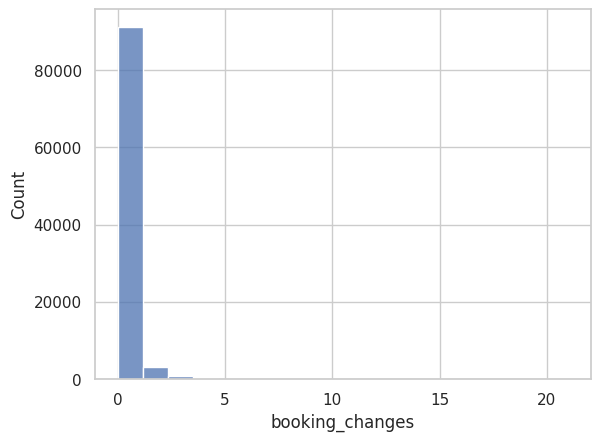

In [ ]:
sns.histplot(df["booking_changes"])

<Axes: xlabel='booking_changes'>

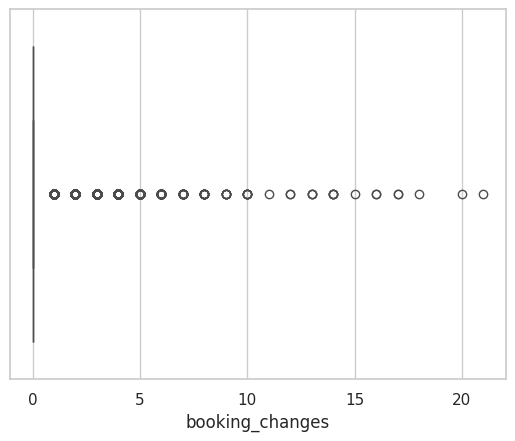

In [ ]:
sns.boxplot(x=df['booking_changes'])

**Insights**
This data provides more insights for operations. This shows that customers do not tend to make any booking changes after they're initial booking. Stable.



>Days in Waiting List :



In [ ]:
df['days_in_waiting_list'].describe()

,days_in_waiting_list
count,29847.000000
mean,2.215901
std,17.009015
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,391.000000


In [ ]:
print("Median: ", df['days_in_waiting_list'].median())

Median:  0.0


<Axes: xlabel='days_in_waiting_list', ylabel='Count'>

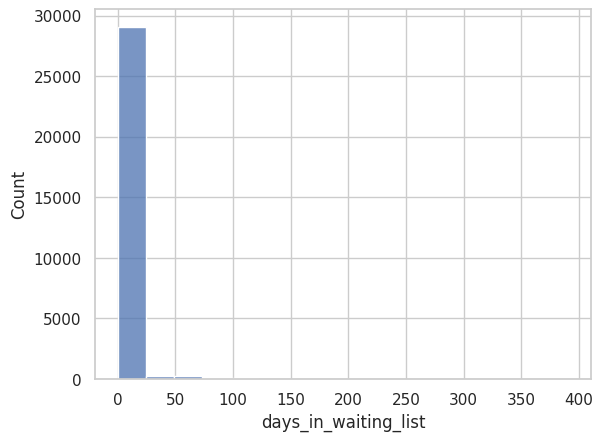

In [ ]:
sns.histplot(df["days_in_waiting_list"])

<Axes: xlabel='days_in_waiting_list'>

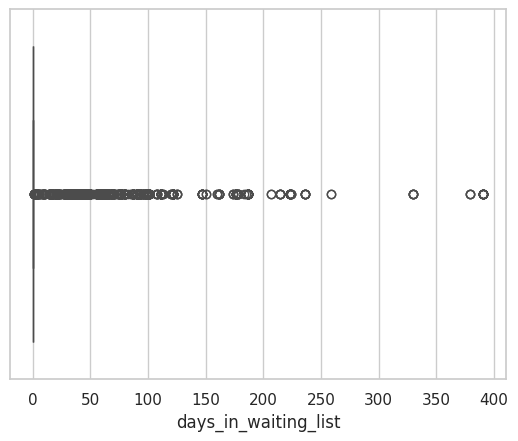

In [ ]:
sns.boxplot(x=df['days_in_waiting_list'])

**Insights**
This metric shows how many days customers have to wait and this is a KPI which a business would preferably want to keep low as the longer a customer has to wait, the more likely they would be to just go to a different hotel. On the otherhand, a higher number could indiciate that the hotel is packed and thus business-wise is going well. We need more data to be able to come up with a relationship. There is a difference between the mean (2) and median (0) with the standard deviation being very very hgih (17). This indicates that the data has many outliers (possibly anomalies) and is not symmetrical at all. In fact, the data has so many outliers that we cannot even see a proper box plot generated. The data not being symmetrical makes sense as days spent in the waiting list can depend on the time as well i.e are guests trying to book the hotel during peak hours.



> ADR :



In [ ]:
df['adr'].describe()

,adr
count,119377.000000
mean,101.830816
std,50.537010
min,-6.380000
25%,69.250000
50%,94.590000
75%,126.000000
max,5400.000000


In [ ]:
print("Median: ", df['adr'].median())

Median:  94.59


<Axes: xlabel='adr', ylabel='Count'>

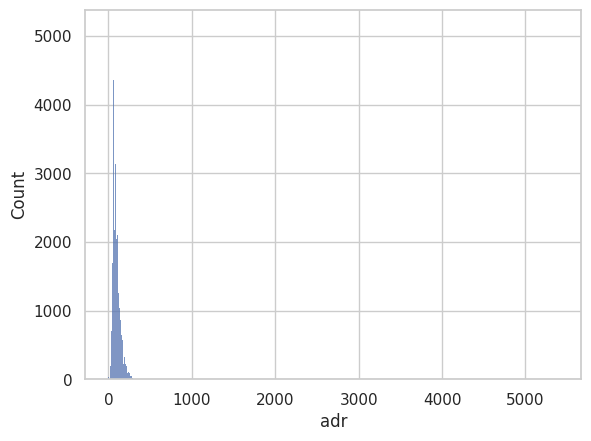

In [ ]:
sns.histplot(df["adr"])

<Axes: xlabel='adr'>

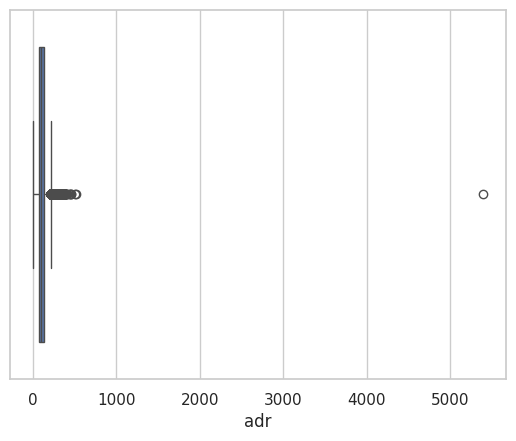

In [ ]:
sns.boxplot(x=df['adr'])

**Insights** ADR or Average Daily Rate tells the average revenue earned per day by a room. The mean and median are not too far apart so we can deduce there aren't many outliers in the data and the boxplot shows only one significant outlier. The standard deviation being 50 is siginificant as this shows that the ADR varies a considerable amount. This variation can be due to the the type of room booked by the guest, the time during which it was booked and so on. There could be a number of reasons which need to be further analyzed.


If we were to remove the extreme outlier that lies out of the 5000 'adr' range, it will get easier to visualize the graph.

In [ ]:
#to check the top 5 records of adr
df.sort_values('adr', ascending=False).head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1.0,35.0,2016.0,March,NaN,25.0,0.0,1.0,2.0,...,Non Refund,12.0,NaN,NaN,Unknown,5400.0,0.0,0.0,Canceled,19/02/2016
111403,City Hotel,0.0,0.0,2017.0,May,NaN,9.0,0.0,1.0,1.0,...,No Deposit,159.0,NaN,0.0,Transient,510.0,0.0,0.0,Check-Out,10/05/2017
15083,Resort Hotel,0.0,1.0,2015.0,July,NaN,15.0,0.0,1.0,NaN,...,No Deposit,NaN,NaN,NaN,Transient,508.0,1.0,0.0,Check-Out,16-Jul-15
103912,City Hotel,0.0,81.0,2016.0,December,NaN,31.0,1.0,1.0,2.0,...,No Deposit,NaN,NaN,NaN,Transient-Party,451.5,0.0,4.0,Check-Out,02/01/2017
13142,Resort Hotel,1.0,378.0,2017.0,August,NaN,1.0,4.0,10.0,2.0,...,No Deposit,314.0,NaN,0.0,Transient,450.0,0.0,0.0,Canceled,22/07/2016


In [ ]:
#dropping the row where adr is 5400
max_adr_dropped_df = df.drop(df[df.adr == 5400].index)

<Axes: xlabel='adr'>

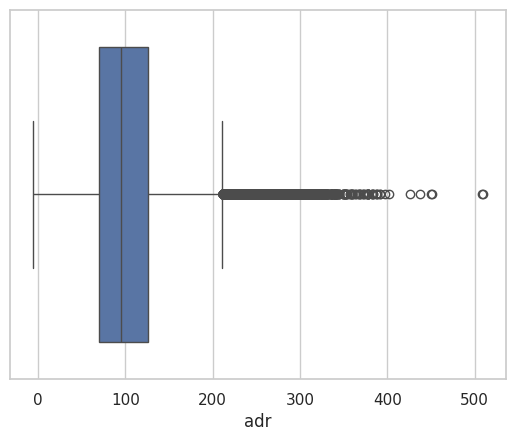

In [ ]:
sns.boxplot(x=max_adr_dropped_df['adr'])

Removing that one extreme outlier now let's us look at the rest of the outliers and the boxplot more clearly. We now see that there is not much difference between the mean and median of 'adr' and the outliers lie outside the range of 200+ adr.



>Required Car Parking Spaces :



In [ ]:
df['required_car_parking_spaces'].describe()

,required_car_parking_spaces
count,119374.000000
mean,0.062526
std,0.245307
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.000000


In [ ]:
print("Median: ", df['required_car_parking_spaces'].median())

Median:  0.0


<Axes: xlabel='required_car_parking_spaces', ylabel='Count'>

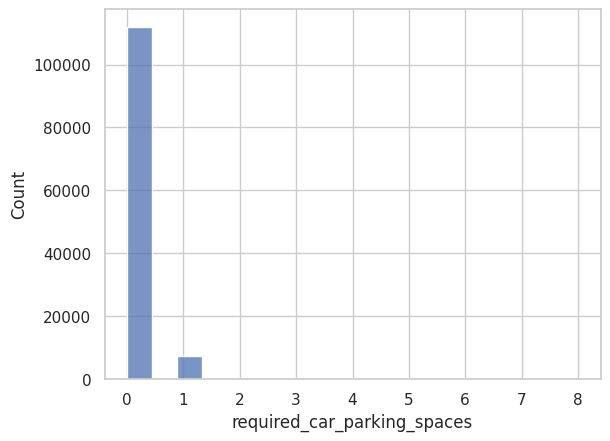

In [ ]:
sns.histplot(df["required_car_parking_spaces"])

<Axes: xlabel='required_car_parking_spaces'>

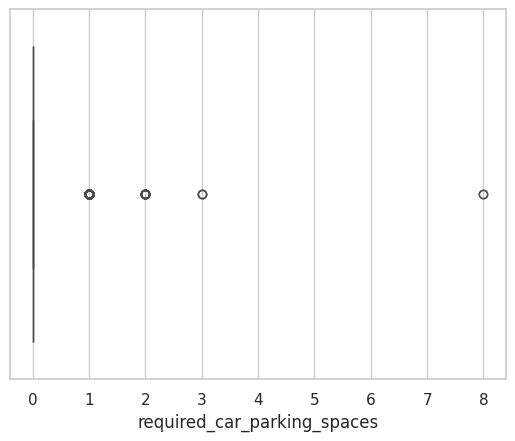

In [ ]:
sns.boxplot(x=df['required_car_parking_spaces'])

In [ ]:
df['required_car_parking_spaces'].value_counts()

,count
required_car_parking_spaces,
0.0,111958
1.0,7383
2.0,28
3.0,3
8.0,2


**Insights**
This metric is more important for the operations team than it is for analysis. The data is symmetric and there are only 4 outliers. It does indicate that the customers who stay at the hotel tend to not have their own cars so the guests probably don't live in the area and are foreign. Gives possible insights into customer segment.



>Total of Special Requests :



In [ ]:
df['total_of_special_requests'].value_counts()

,count
total_of_special_requests,
0.0,70307
1.0,33221
2.0,12968
3.0,2497
4.0,340
5.0,40


In [ ]:
df['total_of_special_requests'].describe()

,total_of_special_requests
count,119373.000000
mean,0.571385
std,0.792820
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,5.000000


In [ ]:
print("Median: ", df['total_of_special_requests'].median())

Median:  0.0


<Axes: xlabel='total_of_special_requests', ylabel='Count'>

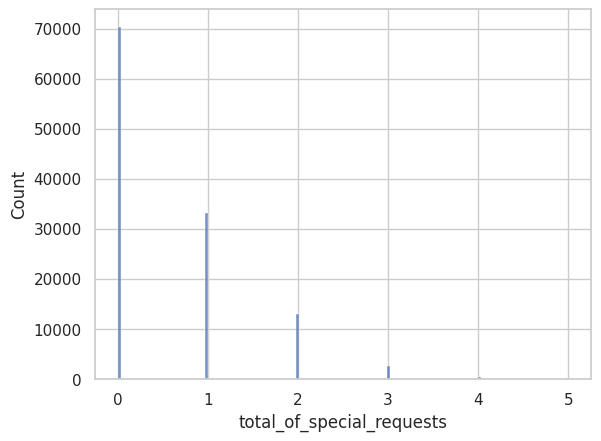

In [ ]:
sns.histplot(df["total_of_special_requests"])

<Axes: xlabel='total_of_special_requests'>

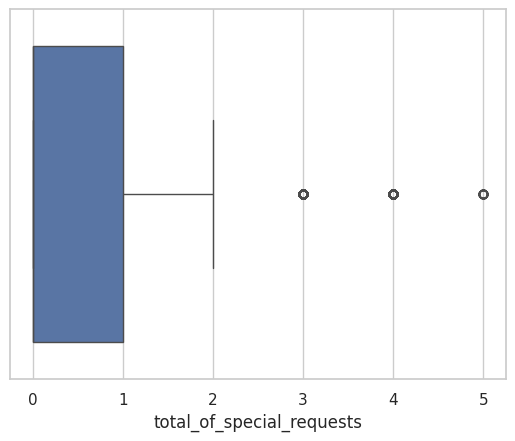

In [ ]:
sns.boxplot(x=df['total_of_special_requests'])



> Agent (consists of IDs of travel agencies) :



In [ ]:
df['agent'].value_counts()

,count
agent,
9.0,31959
240.0,13922
1.0,7191
14.0,3639
7.0,3537
...,...
289.0,1
432.0,1
265.0,1


In [ ]:
df['agent'].describe()

,agent
count,103038.000000
mean,86.691793
std,110.772042
min,1.000000
25%,9.000000
50%,14.000000
75%,229.000000
max,535.000000


In [ ]:
print("Median: ", df['agent'].median())

Median:  14.0


<Axes: xlabel='agent', ylabel='Count'>

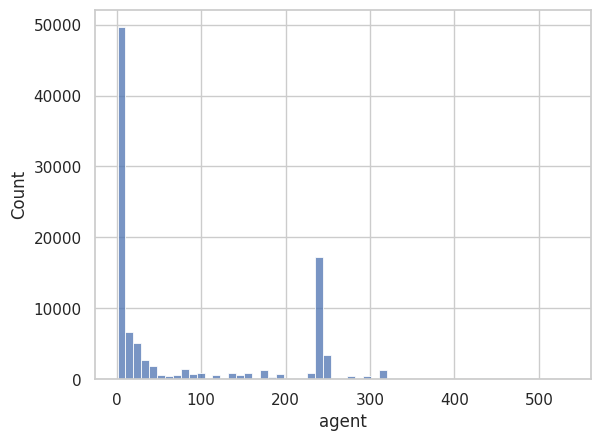

In [ ]:
sns.histplot(df["agent"])

<Axes: xlabel='agent'>

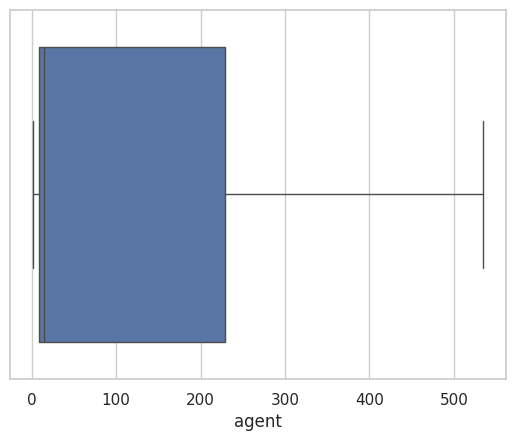

In [ ]:
sns.boxplot(x=df['agent'])

**Insights** The most popular travel agency is agent ID 9 followed by agent ID 240. We can alsoview to boxplot that there are no outliers.



> Company (consists of IDs of companies):



In [ ]:
df['company'].value_counts()

,count
company,
40.0,927
223.0,784
67.0,266
45.0,250
153.0,215
...,...
104.0,1
531.0,1
160.0,1


In [ ]:
df['company'].describe()

,company
count,6795.000000
mean,189.286976
std,131.665904
min,6.000000
25%,62.000000
50%,179.000000
75%,270.000000
max,543.000000


In [ ]:
print("Median: ", df['company'].median())

Median:  179.0


<Axes: xlabel='company', ylabel='Count'>

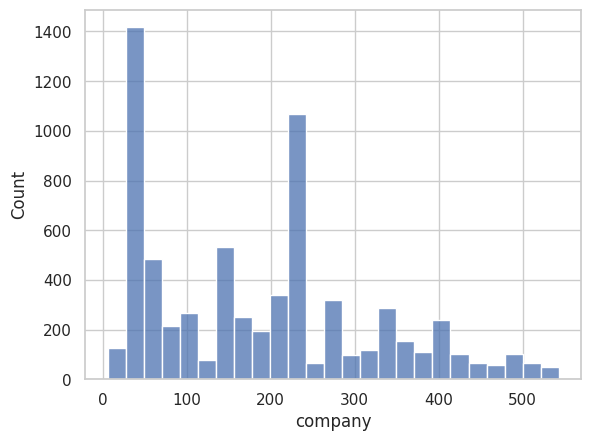

In [ ]:
sns.histplot(df['company'])

<Axes: xlabel='company'>

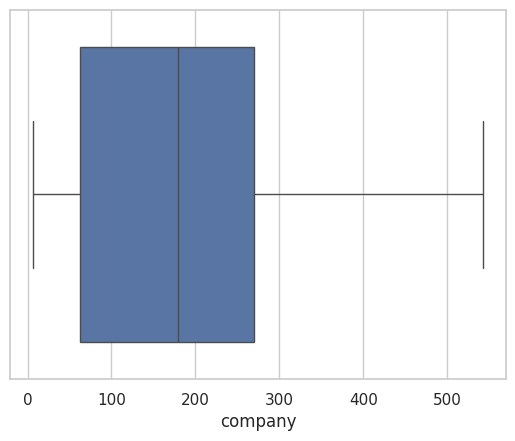

In [ ]:
sns.boxplot(x=df['company'])

Using agent and hotel columns to see travel agents use which hotel more:

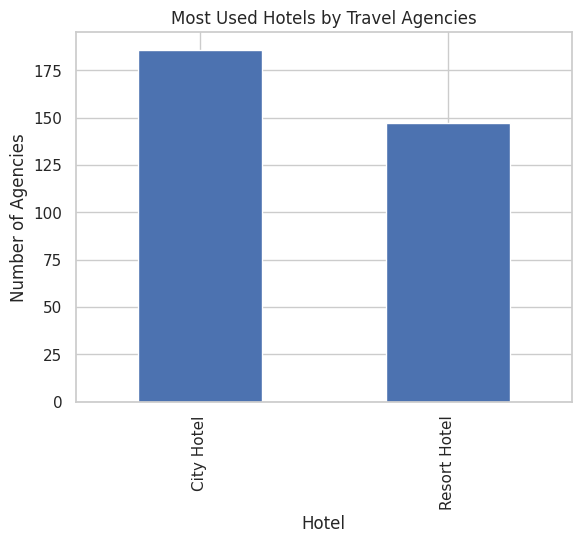

In [ ]:
ta_hotel = df.groupby(['agent', 'hotel']).size().unstack(fill_value=0)
ta_hotel.idxmax(axis=1).value_counts().plot(kind='bar')
plt.title('Most Used Hotels by Travel Agencies')
plt.ylabel('Number of Agencies')
plt.xlabel('Hotel')
plt.show()

Hence we see that City hotel is used more by travel agents rather than resort hotel.

Using lead time and top 10 agent IDs to for a bar chart:

In [ ]:
top_10_agents = df['agent'].value_counts().nlargest(10).index
df_top_agents = df[df['agent'].isin(top_10_agents)]

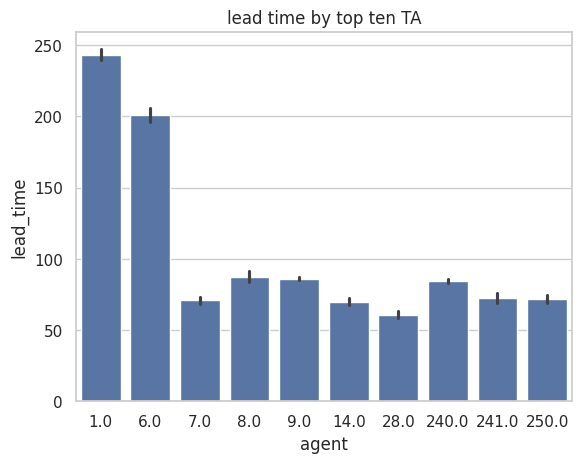

In [ ]:
sns.barplot(x='agent', y='lead_time', data=df_top_agents)
plt.title('lead time by top ten TA')
plt.show()

**Insights** Since hotels optimize lead times hence agent IDs for example here agent IDs 1, 6, 7, 8, 9, 14, 28 etc. (top 10) would be more trustworthy for bookings as they give enough time to the hotel to prepare.

Top Ten agents that companies use the most :

In [ ]:
company_ta = pd.crosstab(df['company'], df['agent'])
top_10_agents = company_ta.sum().nlargest(10).index
agent_usage = company_ta[top_10_agents].sum()

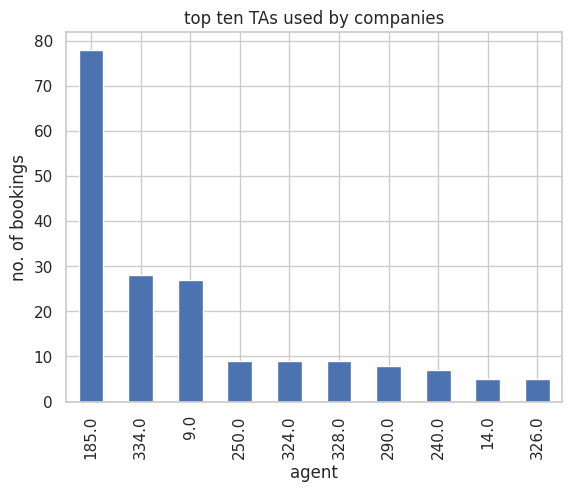

In [ ]:
agent_usage.plot(kind='bar')
plt.title('top ten TAs used by companies')
plt.ylabel('no. of bookings')
plt.show()

**Insights** The travel agency with agent ID 185 is used the most by companies in general. This may tell that this agency is a very reliable agent and also has strong relations with companies.

Using the difference between weekend nights and week nights to see what company prefers weekend nights for a more targetted approach:

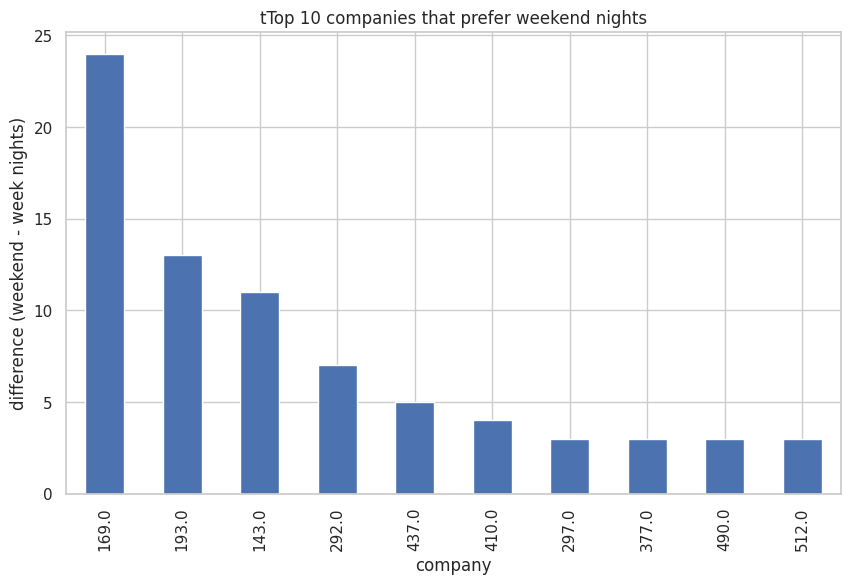

In [ ]:
df['weekend_vs_week'] = df['stays_in_weekend_nights'] - df['stays_in_week_nights']
weekend_preference = df.groupby('company')['weekend_vs_week'].sum()
top_10_companies = weekend_preference.nlargest(10)

#making bar plot for differences to see what companies prefer weekends
top_10_companies.plot(kind='bar', figsize=(10,6))
plt.title('tTop 10 companies that prefer weekend nights')
plt.ylabel('difference (weekend - week nights)')
plt.show()

**Insights** The companies found out by this can be targetted for more weekend offers for example company 169 and 193 prefer weekends more than week nights hence most probably for leisure activities rather than conferences etc.

Using is_canceled and company to find out which company cancels the most:

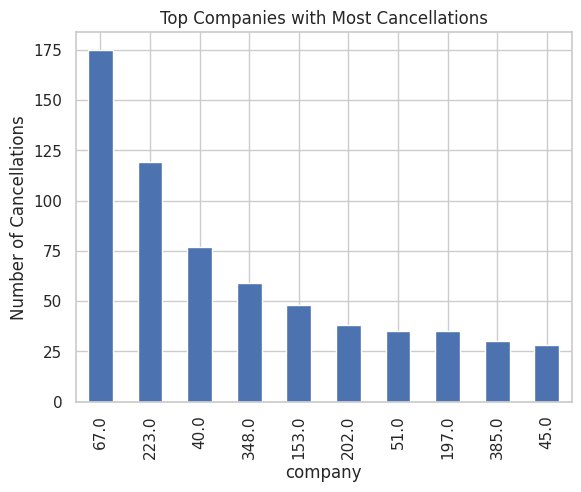

In [ ]:
company_cancellations = df[df['is_canceled'] == 1].groupby('company').size().sort_values(ascending=False).head(10)
company_cancellations.plot(kind='bar')
plt.title('Top Companies with Most Cancellations')
plt.ylabel('Number of Cancellations')
plt.show()

**Insights** Company IDs 67, 223 and 40 are the top 3 companies that cancel their bookings the most hence this can tell us the issues a certain hotel has and then these issues can be fixed by taking feedback from these companies which would better the increment of booking and retention rate.

Using reserved_room_type and comapny to figure out what room type companies book mostly:

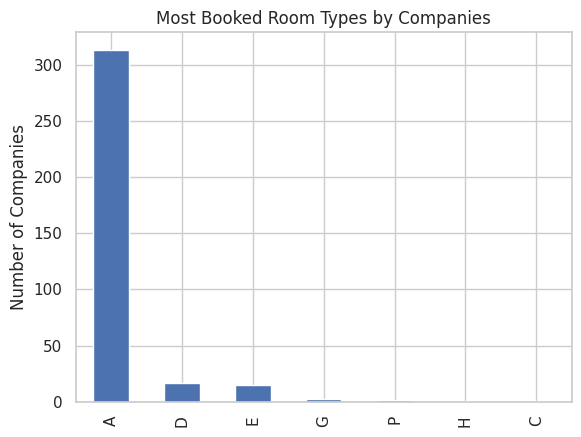

In [ ]:
company_roomtype = df.groupby(['company', 'reserved_room_type']).size().unstack(fill_value=0)
company_roomtype.idxmax(axis=1).value_counts().plot(kind='bar')
plt.title('Most Booked Room Types by Companies')
plt.ylabel('Number of Companies')
plt.show()

**Insights** Room type A is booked by most companies. This also shows that we can see what betterment does romm type A have and apply these changes to other room types so that companies and customers in general can have more room types to book from.

Top ten companies that give the most avg daily rate:

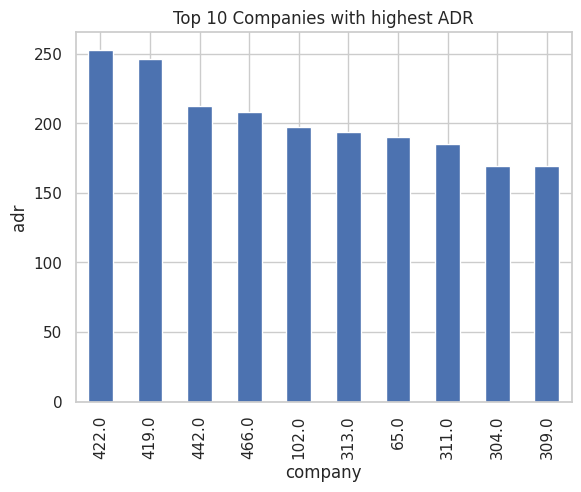

In [ ]:
top_adr_companies = df.groupby('company')['adr'].mean().nlargest(10)
top_adr_companies.plot(kind='bar')
plt.title('Top 10 Companies with highest ADR')
plt.ylabel('adr')
plt.show()

**Insights** The company IDs 422, 419, 442, 466, 102 etc. (top 10 shown above) provide the most revenue (adr) to the hotels. These companies are high paying customers and thus can/should be offered loyalty programs, special offers etc. so that retention rate increases as the hotel becomes the most used hotel for that company eventually.

To find out what month has the most stays by companies:

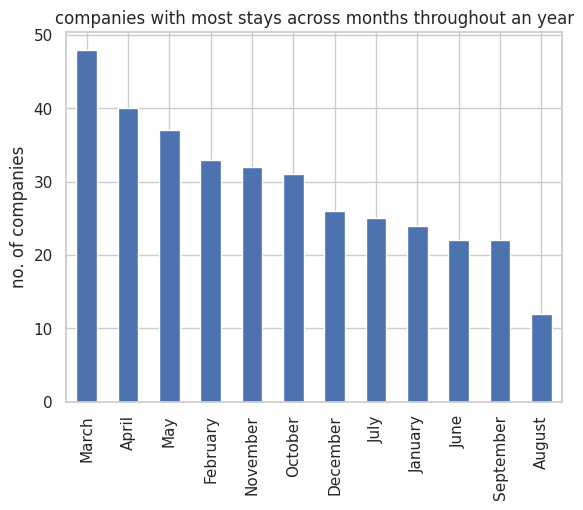

In [ ]:
company_month = df.groupby(['company', 'arrival_date_month']).size().unstack(fill_value=0)
company_month.idxmax(axis=1).value_counts().plot(kind='bar')
plt.title('companies with most stays across months throughout an year')
plt.ylabel('no. of companies')
plt.show()

**Insights** March has the most stays by companies thus shows that it is the peak booking month.

## Categorical Data Analysis



> Description for all categorical columns :



In [ ]:
df.describe(include=['object'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119380,119379,119376,118889,111018,119374,119351,119324,119375,119376,119374,119375
unique,2,12,6,177,8,5,10,12,4,5,3,2317
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015
freq,79322,13875,83020,48583,52528,97857,85963,74016,104628,80691,75155,1284


**Insights** From this description we see that City Hotel has the most records for hotel bookings. August is recoreded to be the month that has the highest bookings. Most customers are from Portugal (PRT) with Online Travel Agencies being the  majority of market segment. It also shows that room type 'A' is the most reserved and assigned room type. Maximum customers opted for the 'no deposit' type with the the highest customer type being 'transient' which means that customers who are staying for a short period of time. The reservation status also shows that majority of the customers were check-out customers that completed there stay.



> Meal :



In [ ]:
# creating a table for 'meal' column with count and count in percentage:
mcount = df['meal'].value_counts()
mpercent = df['meal'].value_counts(normalize=True) * 100
meal_summary = pd.DataFrame({
    'count': mcount,
    'count%': mpercent.round(2)
})

meal_summary

,count,count%
meal,,
BB,83020,69.54
HB,13043,10.93
Invalid,11942,10.00
SC,9584,8.03
Undefined,1078,0.90
FB,709,0.59


Text(0.5, 1.0, 'distribution of meal types')

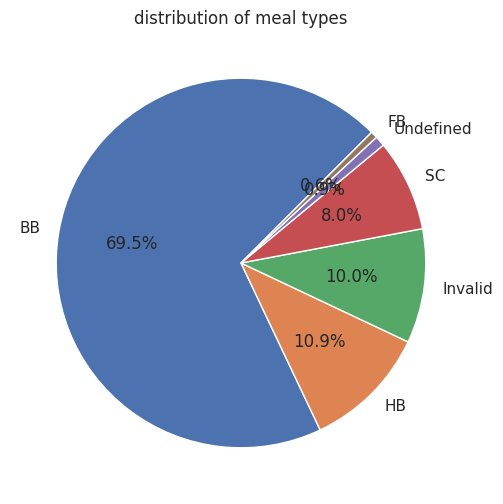

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(mpercent.round(2), labels=mpercent.index, autopct='%1.1f%%', startangle=45)
plt.title('distribution of meal types')


**Insights** In the 'meal' column, the most popular meal type among bookings is BB (Bed and Breakfast) with a percentage of 69.5% and the least popular meal type being FB (Full Board) with 0.6% only.  HB (Half Board), SC (meaning no meal types) and Invalid (not found in meal names) are close in comparison to each other.



> Arrival Date Year :



In [ ]:
df['arrival_date_year'].value_counts()

,count
arrival_date_year,
2016.0,56698
2017.0,40677
2015.0,21995
2026.0,3
2025.0,2
2027.0,1


In here it is evident that years being 2026, 2025, and 2027 can not be possible hence this is a typo error.

In [ ]:
#years record where year is 2026, 2025, 2027
incorrect_year_df = df[df['arrival_date_year'].isin([2026, 2025, 2027])]
incorrect_year_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_vs_week
13512,Resort Hotel,1.0,NaN,2025.0,August,NaN,17.0,2.0,6.0,2.0,...,240.0,NaN,NaN,Transient,237.50,0.0,2.0,Canceled,27/03/2017,-4.0
14274,Resort Hotel,0.0,230.0,2026.0,August,34.0,16.0,4.0,10.0,2.0,...,240.0,NaN,NaN,Unknown,169.93,0.0,1.0,Check-Out,30/08/2016,-6.0
35632,Resort Hotel,0.0,252.0,2026.0,April,NaN,22.0,2.0,5.0,NaN,...,273.0,NaN,NaN,Transient-Party,49.16,0.0,0.0,Check-Out,29/04/2017,-3.0
69291,City Hotel,1.0,12.0,2025.0,May,NaN,29.0,1.0,1.0,2.0,...,9.0,NaN,0.0,Transient,140.00,0.0,1.0,Canceled,18/05/2017,0.0
79528,City Hotel,1.0,5.0,2026.0,November,NaN,2.0,1.0,2.0,2.0,...,9.0,NaN,NaN,Transient,105.00,0.0,1.0,Canceled,28/10/2015,-1.0
109294,City Hotel,0.0,75.0,2027.0,April,14.0,5.0,0.0,4.0,1.0,...,21.0,NaN,0.0,Transient-Party,85.00,0.0,0.0,Check-Out,09/04/2017,-4.0


Here we can look at the reservation status date and confirm that the arrival_date_year has a typo in it so we can now change 2025, 2026, 2027 to 2015, 2016, 2017 respectively.

In [ ]:
df['arrival_date_year'] = df['arrival_date_year'].replace([2026, 2025, 2027], [2016, 2015, 2017])

Now we use adr and arrival date year to see the trend of av daily rate over the 3 years:

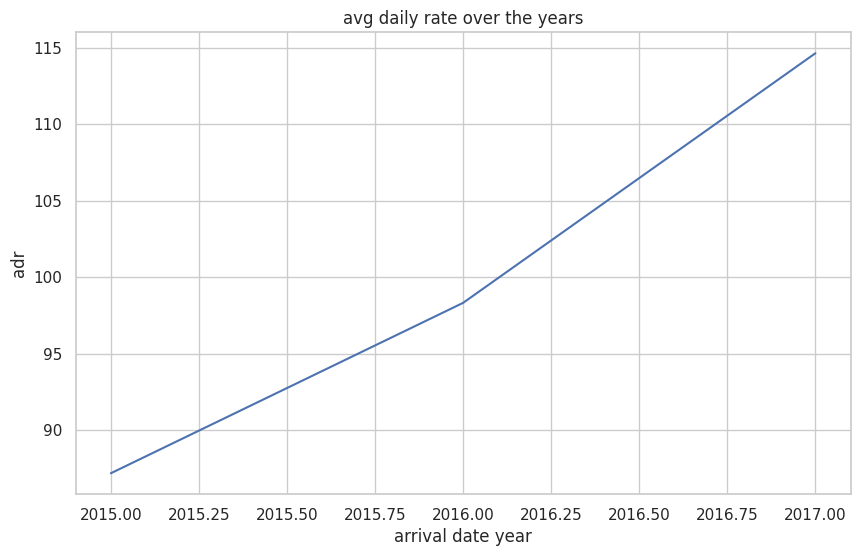

In [ ]:
adr_trend = df.groupby('arrival_date_year')['adr'].mean()

plt.figure(figsize=(10, 6))
plt.plot(adr_trend.index, adr_trend.values)
plt.title('avg daily rate over the years')
plt.xlabel('arrival date year')
plt.ylabel('adr')
plt.grid(True)
plt.show()

This shows that the ADR increases throughout the 3 years but in 2016 the rate of adr increased even more than it was in 2015.



> Arrival Date Month :



In [ ]:
df['arrival_date_month'].value_counts()

,count
arrival_date_month,
August,13875
July,12660
May,11788
October,11159
April,11089
June,10937
September,10508
March,9793
February,8067


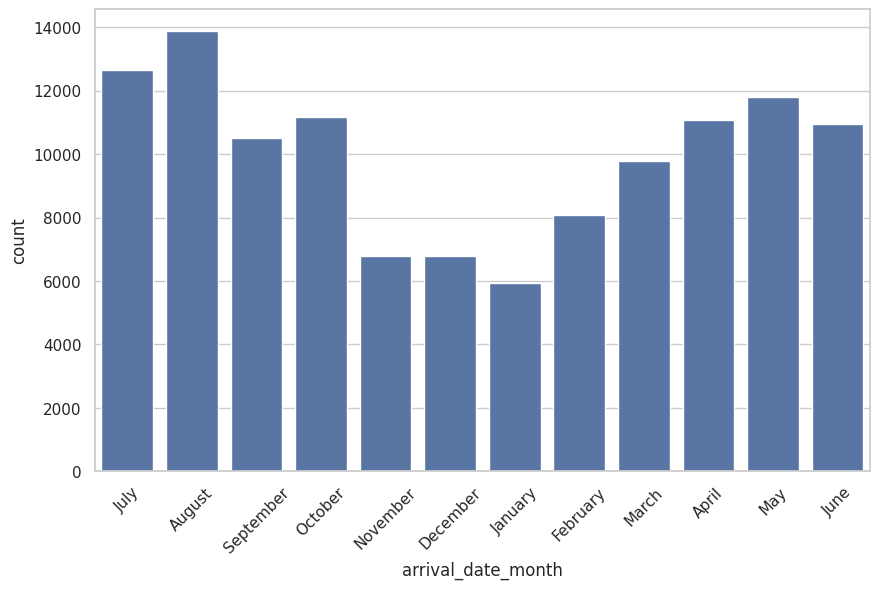

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_date_month', data=df)
plt.xticks(rotation=45)
plt.show()

**Insights** August has the highest bookings of customers that actually arrived at the hotel meaning that the hotels were occupied the most in this month, whereas January is the month being the least occupied throughout the 3 consecutive years.

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
df_sorted = df.sort_values('arrival_date_month')

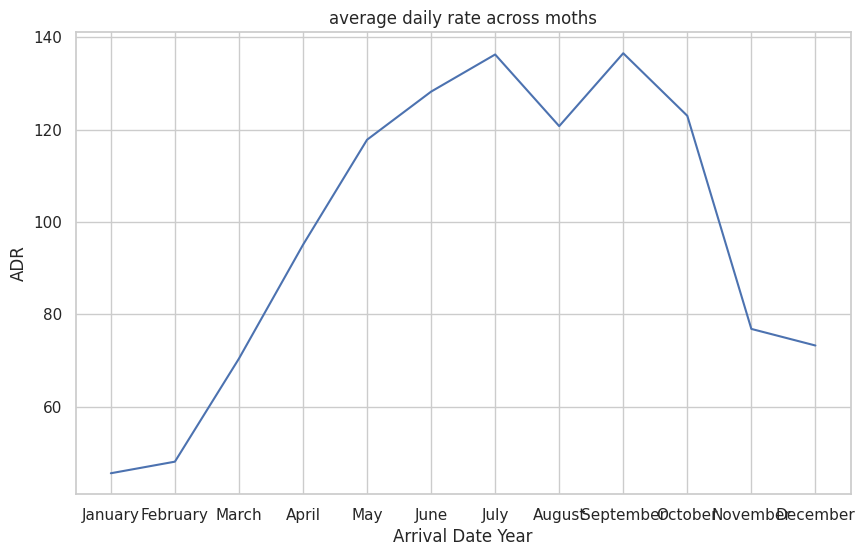

In [ ]:
ltime_trend = df.groupby('arrival_date_month')['lead_time'].mean()

plt.figure(figsize=(10, 6))
plt.plot(ltime_trend.index, ltime_trend.values)
plt.title('average daily rate across moths')
plt.xlabel('Arrival Date Year')
plt.ylabel('ADR')
plt.grid(True)
plt.show()

The trend analysis shows that january has the least adr but it gets an increased growth rate from february to maybut then drops in july and rises back from august. Then it has a gradual decrease till december.



> Country :



In [ ]:
# creating a table for 'meal' column with count and count in percentage:
ccount = df['country'].value_counts()
cpercent = df['country'].value_counts(normalize=True) * 100
country_summary = pd.DataFrame({
    'count': ccount,
    'count%': cpercent.round(2)
})
country_summary


,count,count%
country,,
PRT,48583,40.86
GBR,12128,10.20
FRA,10413,8.76
ESP,8568,7.21
DEU,7287,6.13
...,...,...
DJI,1,0.00
BWA,1,0.00
HND,1,0.00


**Insights** Looking at the value count percentages we see that least most customers that have namely only 1 booking record are from Djibouti, Botswana, Honduras, British Virgin Islands, Non-Aligned Movement (group of countries).

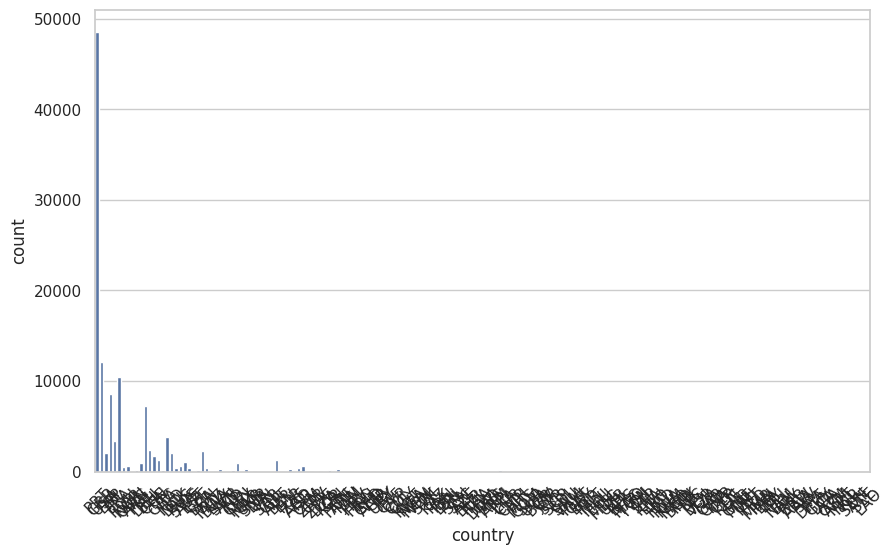

In [ ]:
#normal country bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=df)
plt.xticks(rotation=45)
plt.show()

Since this bar chart is very difficult to read, we can filter out the countries from which most customers come from. Below the filtering method used is by getting the countries who have booking records greater than 1%.

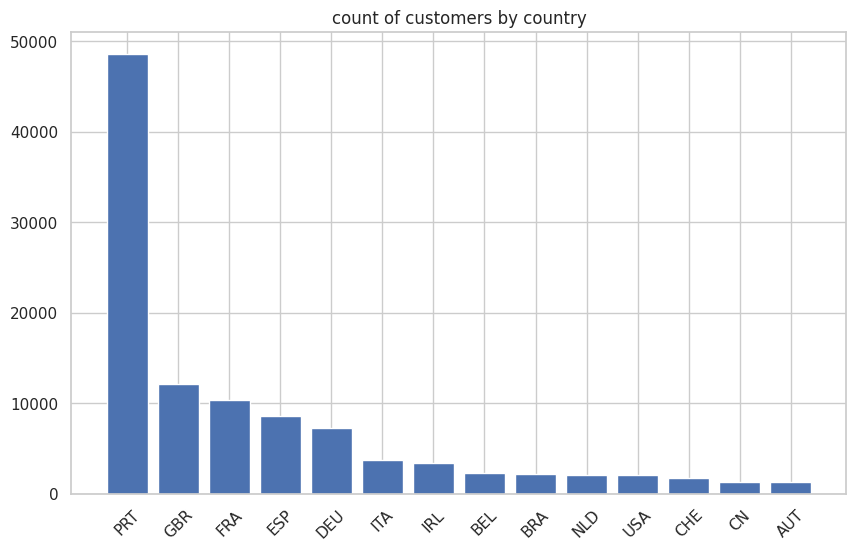

In [ ]:
#only looking at countries with customer count greater than 1% to see why
filtered_country = country_summary[country_summary['count%'] > 1.0]
plt.figure(figsize=(10, 6))
plt.bar(filtered_country.index, filtered_country['count'])
plt.title('count of customers by country')
plt.xticks(rotation=45)
plt.show()

**Insights** Now it is easier to see that most of the customers are from the top five countries Portugal, United Kingdom, France, Spain and Germany with their percentages of booking records being higher than 6%.



> Market Segment:



In [ ]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,52528
Offline TA/TO,22540
Groups,18422
Direct,11700
Corporate,4920
Complementary,692
Aviation,214
Undefined,2


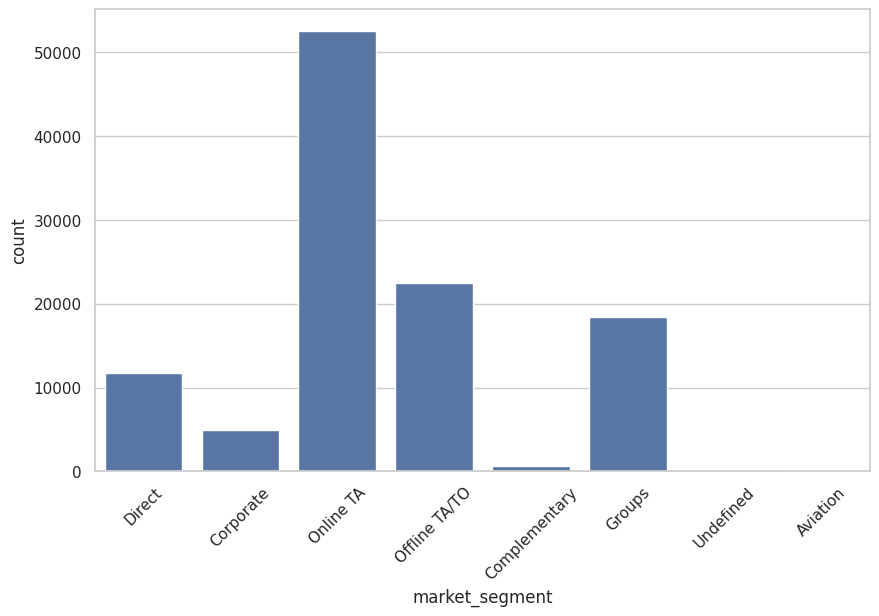

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment', data=df)
plt.xticks(rotation=45)
plt.show()
#can we remove 'undefined' rows?

**Insights** Most of the market segment is from Online Travel Agencies followed by Offline TA/TO which means that big part of the companies earnings is through Travel Agency bookings. Aviation and Undefined have the least booking records.



> Distribution Channels :



In [ ]:
df['distribution_channel'].value_counts()

,count
distribution_channel,
TA/TO,97857
Direct,14643
Corporate,6676
GDS,193
Undefined,5


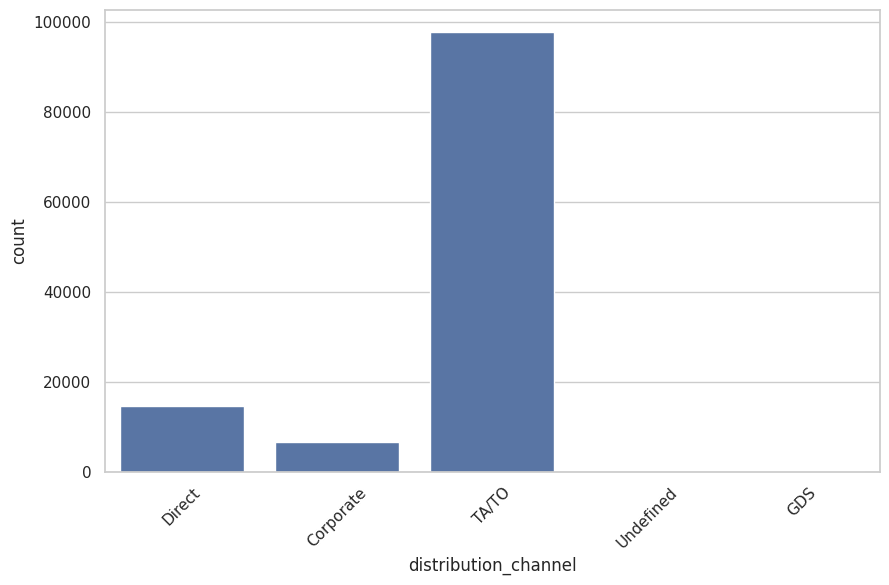

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='distribution_channel', data=df)
plt.xticks(rotation=45)
plt.show()
#again, we need to remove undefined rows

In [ ]:
#to see what market segment uses what and how much of a distribution channel
pd.crosstab(df['market_segment'], df['distribution_channel'])

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
market_segment,,,,,
Aviation,204,0,0,10,0
Complementary,83,537,0,72,0
Corporate,4451,156,0,313,0
Direct,83,11404,1,210,2
Groups,1139,1368,0,15914,0
Offline TA/TO,197,15,41,22286,0
Online TA,42,123,134,52228,1
Undefined,0,0,0,0,2


**Insights** Performing cross tabulations between the market segment and distribution channel shows that every market segment has a preffered distribution channel that they use mostly for example Online TA, Offline TA/TO and Groups usually use TA/TO distribution channel. Aviation (Airline Staff) mostly use the Corporate distribution channel as their company pays for their stay (in most cases) while Complementary segment uses Direct distribution channel.

Below is a histogram of market_segment across distribution_channel that just visually shows that the blank spaces represnt no contact between the market segment and distribution channel.

<Axes: xlabel='distribution_channel', ylabel='market_segment'>

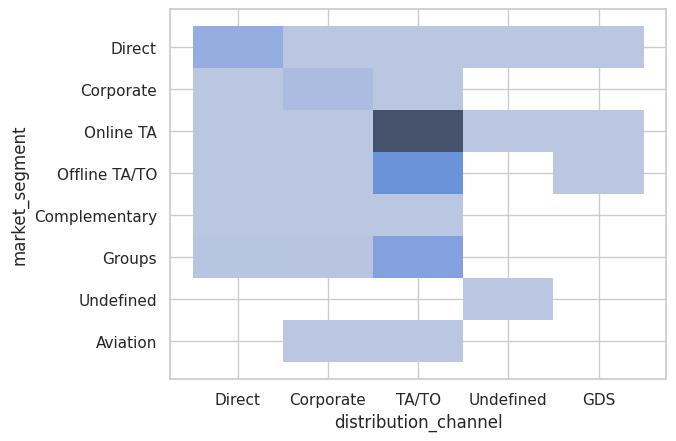

In [ ]:
#this is just a way to show it visually
sns.histplot(df, x='distribution_channel', y='market_segment')



> Reserved and Assigned Room Types :



In [ ]:
df['reserved_room_type'].value_counts()

,count
reserved_room_type,
A,85963
D,19196
E,6533
F,2896
G,2094
B,1118
C,932
H,601
P,12


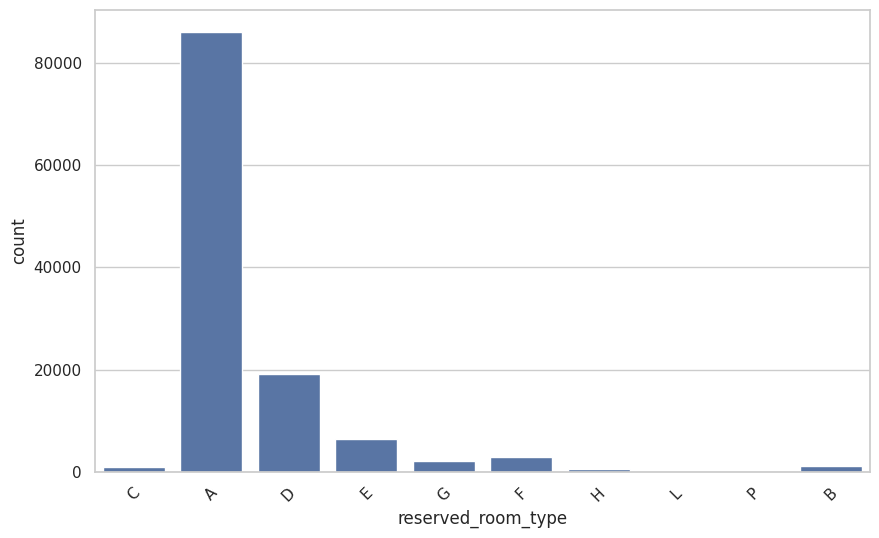

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='reserved_room_type', data=df)
plt.xticks(rotation=45)
plt.show()

**Insights** In reserved room types 'A' was the most reserved room type while 'L' and 'P' were the least reserved room types.

In [ ]:
df['assigned_room_type'].value_counts()
#has extra room type of 'I' and 'K'

,count
assigned_room_type,
A,74016
D,25313
E,7800
F,3746
G,2550
C,2372
B,2163
H,710
I,363


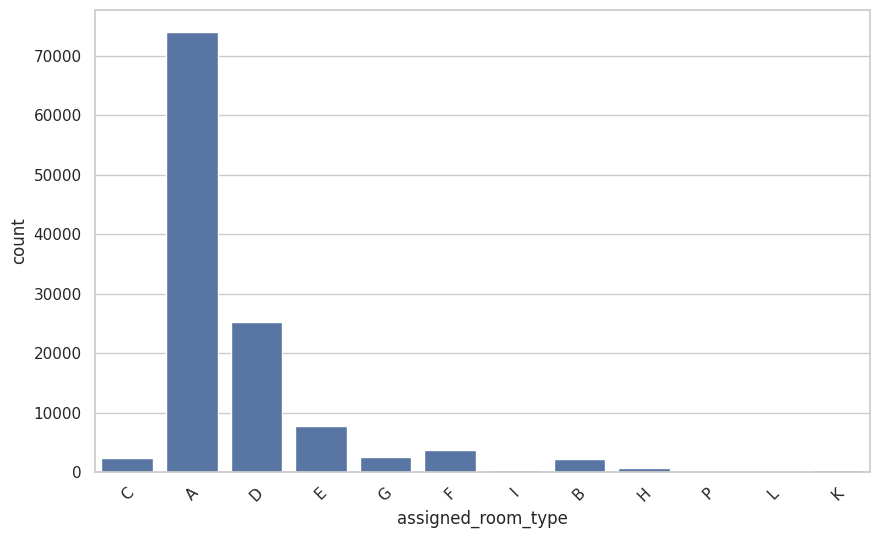

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='assigned_room_type', data=df)
plt.xticks(rotation=45)
plt.show()

**Insights** In assigned room types, 'A' is still the most assigned room type and 'L' and 'P' still remain the least assigned room type even though there were two more room types 'I' and 'K' added to the room type options.

In [ ]:
#rooms that were reserved but were not assigned
unused = df['reserved_room_type'].value_counts() - df['assigned_room_type'].value_counts()

In [ ]:
diff_df = pd.DataFrame({
    'room_type': unused.index,
    'diff': unused.values
})
diff_df

,room_type,diff
0,A,11947.0
1,B,-1045.0
2,C,-1440.0
3,D,-6117.0
4,E,-1267.0
5,F,-850.0
6,G,-456.0
7,H,-109.0
8,I,NaN
9,K,NaN


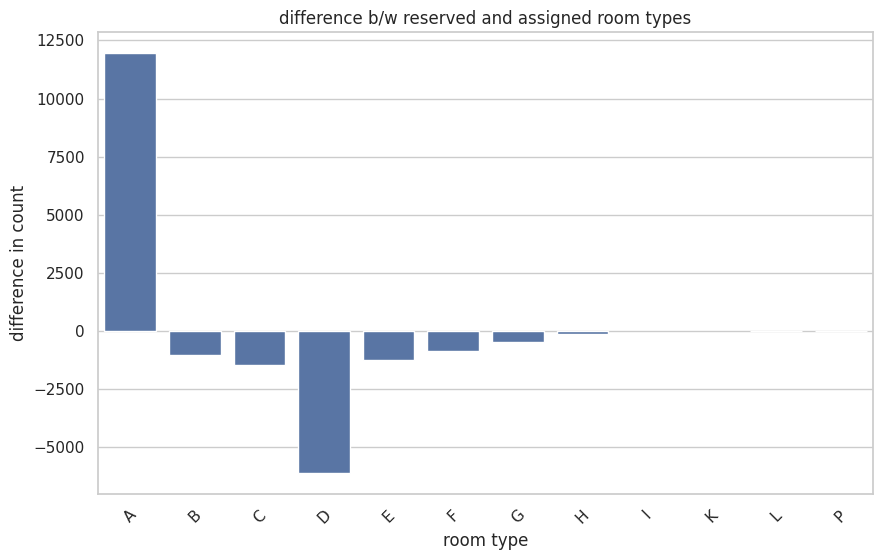

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='room_type', y='diff', data=diff_df)
plt.title('difference b/w reserved and assigned room types')
plt.xlabel('room type')
plt.ylabel('difference in count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
#we see that except for room type A all other room types were assigned more than they were reserved
#I and K are the only ones given only when assigned

**Insight** Here the difference between reserved and assigned room types show that except for room type 'A' all the other room types were assigned to more customers on hand without actually reserving for that room type beforehand.



> Deposit Type :



In [ ]:
df['deposit_type'].value_counts()

,count
deposit_type,
No Deposit,104628
Non Refund,14584
Refundable,162
No Depo,1


The 'no depo' might just be a human error since 'no depo' means 'no deposit' hence we change its type to 'no deposit'

In [ ]:
df[df['deposit_type'] == 'No Depo']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_vs_week
104,Resort Hotel,0.0,102.0,2015.0,July,NaN,4.0,2.0,5.0,2.0,...,240.0,NaN,NaN,Transient,96.3,0.0,1.0,Check-Out,11/07/2015,-3.0


In [ ]:
#changing the no_depo type to no_deposit cause that is the same thing
df['deposit_type'] = df['deposit_type'].replace('No Depo', 'No Deposit')
df['deposit_type'].value_counts()

,count
deposit_type,
No Deposit,104629
Non Refund,14584
Refundable,162


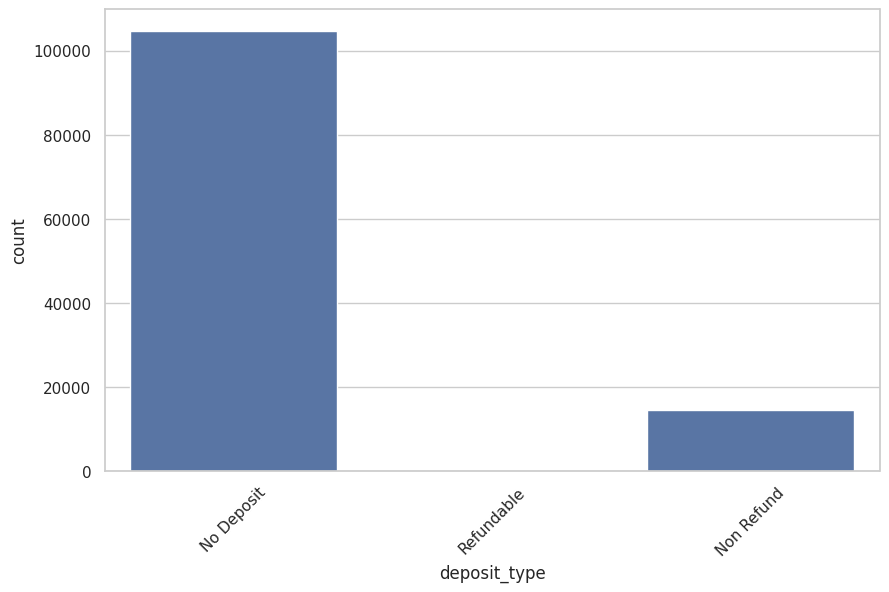

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='deposit_type', data=df)
plt.xticks(rotation=45)
plt.show()

In this bar chart the 'Refundable' type in deposit_type is especially very low than 'No Deposit' and 'Non Refund' types.

In [ ]:
df[df['deposit_type'] == 'Refundable']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_vs_week
1559,Resort Hotel,0.0,14.0,2015.0,September,NaN,4.0,0.0,2.0,3.0,...,96.0,NaN,0.0,Transient-Party,128.0,1.0,0.0,Check-Out,06/09/2015,-2.0
4737,Resort Hotel,0.0,169.0,2016.0,March,NaN,31.0,0.0,3.0,NaN,...,NaN,223.0,0.0,Transient-Party,66.0,0.0,0.0,Check-Out,03-Apr-16,-3.0
4738,Resort Hotel,0.0,169.0,2016.0,March,NaN,31.0,0.0,3.0,NaN,...,NaN,223.0,NaN,Transient-Party,66.0,0.0,0.0,Check-Out,03/04/2016,-3.0
4739,Resort Hotel,0.0,169.0,2016.0,March,NaN,31.0,0.0,3.0,2.0,...,NaN,223.0,NaN,Transient-Party,66.0,0.0,0.0,Check-Out,03/04/2016,-3.0
4740,Resort Hotel,0.0,169.0,2016.0,March,NaN,31.0,0.0,3.0,2.0,...,NaN,223.0,NaN,Transient-Party,66.0,0.0,0.0,Check-Out,03/04/2016,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79652,City Hotel,0.0,0.0,2015.0,October,NaN,30.0,0.0,2.0,1.0,...,63.0,NaN,0.0,Unknown,85.0,0.0,0.0,Check-Out,01-Nov-15,-2.0
79980,City Hotel,0.0,29.0,2015.0,November,NaN,6.0,1.0,2.0,2.0,...,22.0,NaN,NaN,Transient-Party,63.0,0.0,0.0,Check-Out,09/11/2015,-1.0
85497,City Hotel,0.0,51.0,2016.0,March,NaN,16.0,0.0,1.0,1.0,...,NaN,185.0,0.0,Transient-Party,85.5,0.0,0.0,Check-Out,17/03/2016,-1.0
85498,City Hotel,0.0,51.0,2016.0,March,NaN,16.0,0.0,1.0,1.0,...,NaN,185.0,NaN,Transient-Party,85.5,0.0,0.0,Check-Out,03/17/2016,-1.0


In [ ]:
pd.crosstab(df['market_segment'], df['deposit_type'], normalize='all') * 100

deposit_type,No Deposit,Non Refund,Refundable
market_segment,,,
Aviation,0.192765,0.000000,0.000000
Complementary,0.623334,0.000000,0.000000
Corporate,4.152555,0.275636,0.003603
Direct,10.520105,0.014412,0.004504
Groups,8.801434,7.686279,0.105390
Offline TA/TO,16.122000,4.176875,0.003603
Online TA,47.254450,0.047741,0.013512
Undefined,0.001802,0.000000,0.000000


Here we can see that the 'Refundable' deposit type is being used mostly by 'Groups'. This shows that if we market the 'Refundable' type more towards 'Groups' there is potential that the amount of hotel bookings increase through 'Groups'.



> Customer Types :



In [ ]:
custcounts = df['customer_type'].value_counts()
custcounts

,count
customer_type,
Transient,80691
Transient-Party,22619
Unknown,11879
Contract,3653
Group,534


**Insights** Most bookings were made by Transient customers whereas the least bookings were made by Group customer type.

In [ ]:
#checking customer_types that use rooms I and K
assigRoomIK = df[df['assigned_room_type'].isin(['I','K'])]
custcountsIK = assigRoomIK['customer_type'].value_counts()
custcountsIK

,count
customer_type,
Transient,422
Transient-Party,128
Unknown,68
Contract,15
Group,8


Since the room types 'I' and 'K' were added when assigning only thus we can analyze their relation to customer types. The customer types having 'I' and 'K' room types have the same pattern as customer types using the all room types. This is also shown below by the comparison between the two charts.

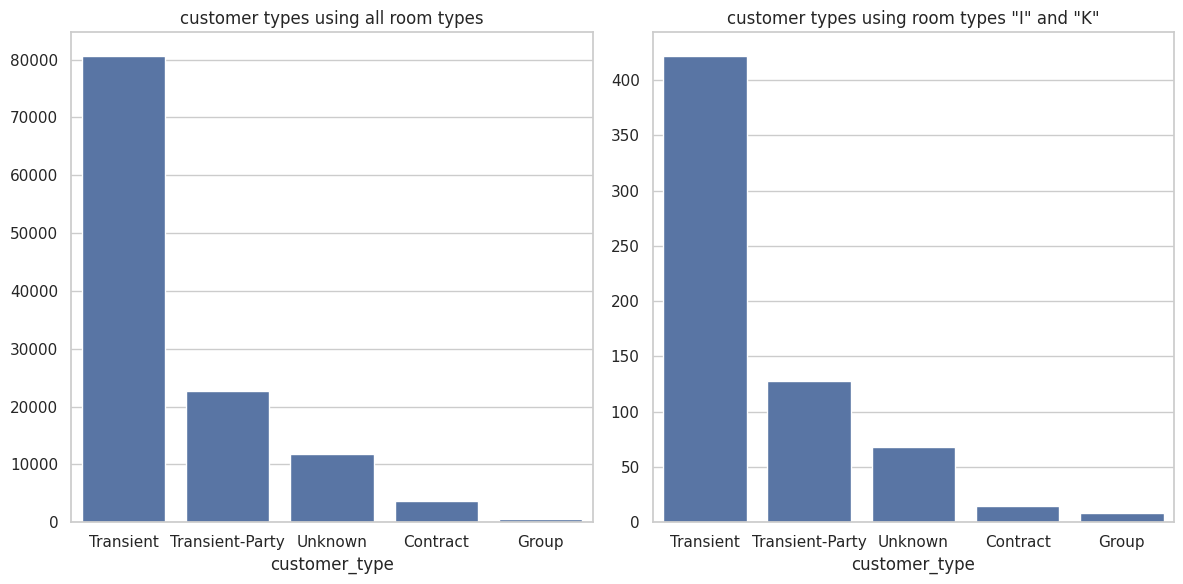

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=custcounts.index, y=custcounts.values, ax=axs[0])
axs[0].set_title('customer types using all room types')

sns.barplot(x=custcountsIK.index, y=custcountsIK.values, ax=axs[1])
axs[1].set_title('customer types using room types "I" and "K"')

plt.tight_layout()
plt.show()

In [ ]:
canceled_df = df['is_canceled'].map({0.0: 'No', 1.0: 'Yes'})
pd.crosstab(df['assigned_room_type'], canceled_df)

is_canceled,No,Yes
assigned_room_type,,
A,41097,32918
B,1651,512
C,1926,446
D,18955,6358
E,5833,1967
F,2821,925
G,1771,779
H,460,250
I,358,5


**Insight** But if we perform cross tabulation between the column that tells if the booking is cancelled or not with the assigned room type we see that customers having rooms assigned 'L' and 'P' always cancel their booking. We also see that room types 'I' and 'K' have the least cancellation rate as the count of 'No' is very big compared to the count of 'Yes'.



> Reservation Status :



In [ ]:
rcount = df['reservation_status'].value_counts()
rpercent = df['reservation_status'].value_counts(normalize=True) * 100
retention = pd.DataFrame({
    'count': rcount,
    'retention rate %': rpercent.round(2)
})

retention

,count,retention rate %
reservation_status,,
Check-Out,75155,62.96
Canceled,43012,36.03
No-Show,1207,1.01


**Insights** The retention rate for both hotels is 62.96% which means that the hotels are doing fairly good at maintaining a retenion rate greater than 50%. Below is a barchart that shows this visually.

Text(0, 0.5, 'count')

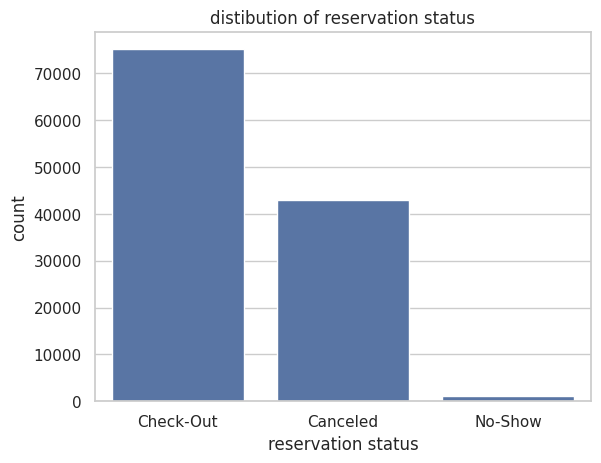

In [ ]:
sns.countplot(x='reservation_status', data=df)
plt.title("distibution of reservation status")
plt.xlabel("reservation status")
plt.ylabel("count")

In [ ]:
pd.crosstab(df['reservation_status'], df['hotel'], normalize=True) * 100

hotel,City Hotel,Resort Hotel
reservation_status,,
Canceled,26.959195,9.072403
Check-Out,38.717298,24.239987
No-Show,0.767343,0.243774


**Insight** Between the two hotels mentioned in the data, City Hotel has a better retention rate than Resort Hotel. On the other hand City Hotel also has a higher Cancellation rate than Resort Hotel.

In [ ]:
room_res_status = pd.crosstab(df['assigned_room_type'],df['reservation_status'], normalize=True ) * 100
room_res_status

reservation_status,Canceled,Check-Out,No-Show
assigned_room_type,,,
A,26.990605,34.441809,0.596700
B,0.403108,1.383639,0.025980
C,0.351986,1.614106,0.021790
D,5.110498,15.885454,0.217896
E,1.575555,4.888412,0.072911
F,0.724923,2.364171,0.050284
G,0.639441,1.484207,0.013409
H,0.202811,0.385508,0.006704
I,0.002514,0.300026,0.001676


<Figure size 1000x600 with 0 Axes>

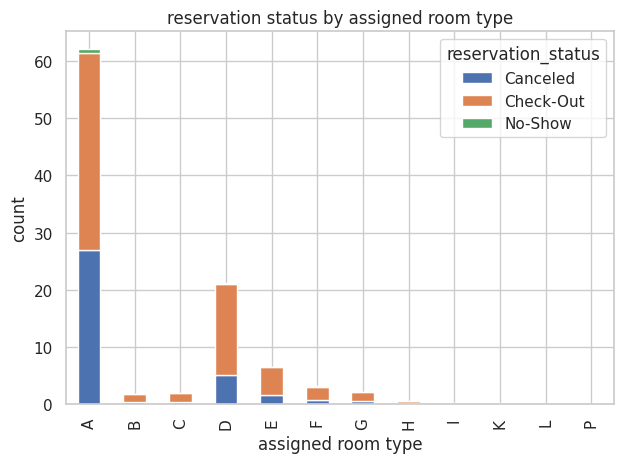

In [ ]:
plt.figure(figsize=(10, 6))
room_res_status.plot(kind='bar', stacked=True)
plt.title("reservation status by assigned room type")
plt.xlabel("assigned room type")
plt.ylabel("count")
plt.tight_layout()
plt.show()

**Insights** This stacked bar chart shows that room type 'A' has the most retention rate.

Below we grouped adr by customer type to figure out what customer type has the highest average daily rate:

In [ ]:
cust_adr = df.groupby('customer_type')['adr'].mean()
cust_adr

,adr
customer_type,
Contract,87.594897
Group,84.792397
Transient,106.943037
Transient-Party,86.107720
Unknown,102.178773


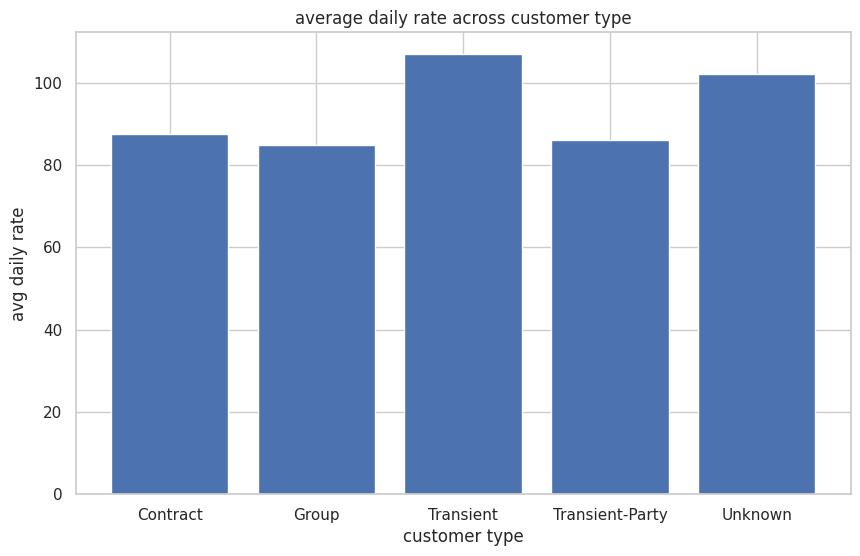

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(cust_adr.index, cust_adr.values)
plt.title('average daily rate across customer type')
plt.xlabel('customer type')
plt.ylabel('avg daily rate')
plt.grid(True)
plt.show()

**Insights** The highest average daily rate across customer type from both hotels combined is Transient type followed by the Unknown group. The lowest adr, although it is not that low than the rest, is by the customer type Group.  

Next we will use a boxplot to visualize the distribution of average daily rate for each market segment:

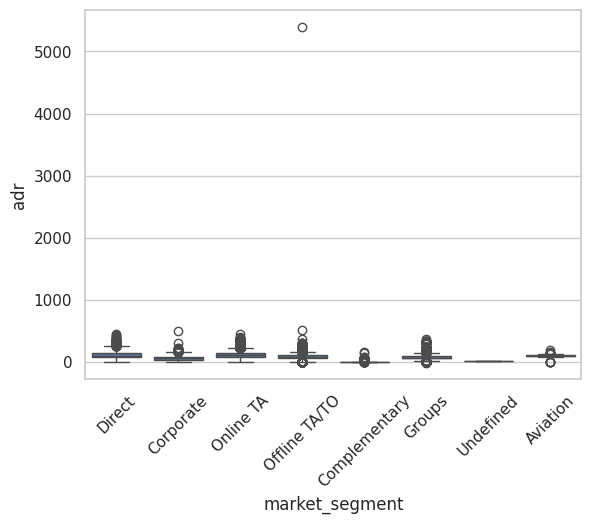

In [ ]:
sns.boxplot(x='market_segment', y='adr', data=df)
plt.xticks(rotation=45)
plt.show()

Since there is an extreme outlier in 'adr' we will take that out and then analyze the rest.

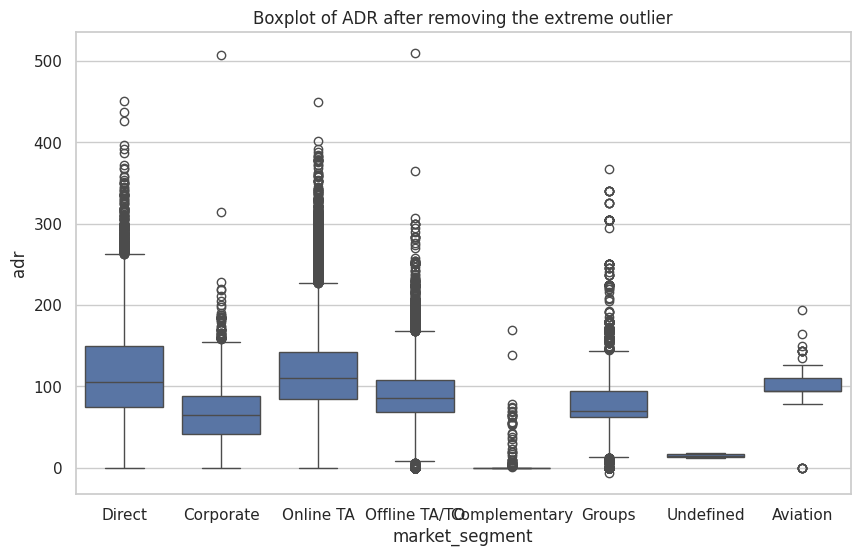

In [ ]:
max_adr_dropped_df = df.drop(df[df.adr == 5400].index)

plt.figure(figsize=(10, 6))
sns.boxplot(x='market_segment', y='adr', data=max_adr_dropped_df)
plt.title('Boxplot of ADR after removing the extreme outlier')
plt.show()

Here we can see that amongst all segments Direct and Online TA have higher and more spread out avg daily rate thus these are high paying customers that we can retain by offering special benefits or offers.

Having a lower median also tells us that segments with medium to low avg daily rates (Corporate, Groups, Offline TA and Aviation) should be offered discounts etc. to attract them more so that the number of bookings can increase.

The Complementary and Undefined section have very low average daily rate.

# Outliers and Anomalies

**Lead Time**:
In Lead Time, we have a number of outliers and anomalies. The 2 notable outliers are the values which are 700+ while the remaining outliers are forming anomalies. The anomaly can be explained by lead time varying heavily depending on the time of the year when a booking was made as demand for hotels depends heavily on what time of the year it is (vacations).

**Adults**: We have the most outliers for adults compared to the children and babies column which makes sense as we can expect the number of adults checking into a customer can vary more than the number of kids. The median is the best indicator/benchmark for the business to understand that a majority of times, 2 adults together will be booking their hotel and due to them most probably not havind children or babies they will either be couples, office-workers or friends.

**Children**: There are just 4 outliers in the data with the most significant one being one of value 10. Considering the sample size, these outliers don't have a very large effect on our insight as these seem to be just very rare, one-off instances for the hotel.

**Babies**: The data is similar to the children column as we also have only 4 outliers here with the most signifcant one being of value 10. More interestingly enough the outliers are spaced much further apart and appear to be just rare, one-off instances which can be easily ignored.

**Booking Changes**: We have many more outliers and they seem to be following a trend where they are increasing. These outliers could offer insights as there might be increased booking changes for certain customers or certain times of the year.


**Days in waiting List**: We have many more outliers with the most significant ones being close to 400 (2 outliers). There were so many outliers that a proper boxplot wasn't even generated on the graph so this column requires further analysis as there doesn't seem to be a trend forming for this column we can easily analyze at first glance.


**ADR**: ADR has one outlier which is very significant as it has an abnormally large value of 5000+. In fact it is so large the boxplot doesn't even generate proplerly and due to it being such a large value it has a huge impact on the mean and standard deviation, altering the trend of the data greatly. The outlier is not a replaceable phenomena.

**Required Car Parking Spaces**: There are only 4 outliers with the most significant one being of value 8. It is apparent only for very rare or special occasions will such outliers occur so the median value of 0 is a good benchmark for the business.

**Total of Special Requests**: This has even fewer outliers than car parking spaces (3) but they are not as different from the median as compared to above. However, the conclusion remains the same that these outliers are very rare occasions so a benchmark of 0 is good for the business.

# Wrangling the Data

**Approach** First we will drop unnnecessary columns, then remove those rows where approximately 70% of the columns have missing data and then fill in the missing values into the important columns.

In [ ]:
df = df.drop(['arrival_date_week_number', 'arrival_date_day_of_month','reservation_status_date','deposit_type','previous_cancellations', 'required_car_parking_spaces', 'total_of_special_requests','previous_bookings_not_canceled','booking_changes'], axis=1)

Since babies and children come in the same category, we can add the babies count to children and then drop the babies column and keep the children column.

In [ ]:
df['children'] = df['children'] + df['babies']
df = df.drop('babies', axis=1)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,...,is_repeated_guest,reserved_room_type,assigned_room_type,agent,company,days_in_waiting_list,customer_type,adr,reservation_status,weekend_vs_week
0,Resort Hotel,0.0,342.0,2015.0,July,0.0,0.0,2.0,0.0,BB,...,0.0,C,C,NaN,NaN,0.0,Transient,0.0,Check-Out,0.0
1,Resort Hotel,0.0,737.0,2015.0,July,0.0,0.0,2.0,0.0,BB,...,0.0,C,C,NaN,NaN,NaN,Transient,0.0,Check-Out,0.0
2,Resort Hotel,0.0,7.0,2015.0,July,0.0,1.0,1.0,0.0,BB,...,0.0,A,C,NaN,NaN,0.0,Transient,75.0,Check-Out,-1.0
3,Resort Hotel,0.0,13.0,2015.0,July,0.0,1.0,1.0,0.0,BB,...,0.0,A,NaN,304.0,NaN,0.0,Transient,75.0,Check-Out,-1.0
4,Resort Hotel,0.0,14.0,2015.0,July,0.0,2.0,2.0,0.0,BB,...,0.0,A,A,240.0,NaN,NaN,Transient,98.0,Check-Out,-2.0


We removed the following columns:
* **arrival_date_week_number** : week number not being used anywhere
* **arrival_date_day_of_month** : no deep relation to booking pattern
* **reservation_status_date** : arrival year and month already exist
* **deposit_type** : no as such correlation with columns related to booking pattern
* **previous_cancellations** : does not help much in improving customer or booking pattern
* **babies** : already added to children column
* **required_car_parking_spaces** : does not help much in improving customer or booking pattern
* **total_of_special_requests** : does not help much in improving customer or booking pattern
* **previous_bookings_not_canceled** : does not help much in improving customer or booking pattern
* **booking_changes** : does not specify what changes exactly hence not of much use



<Axes: >

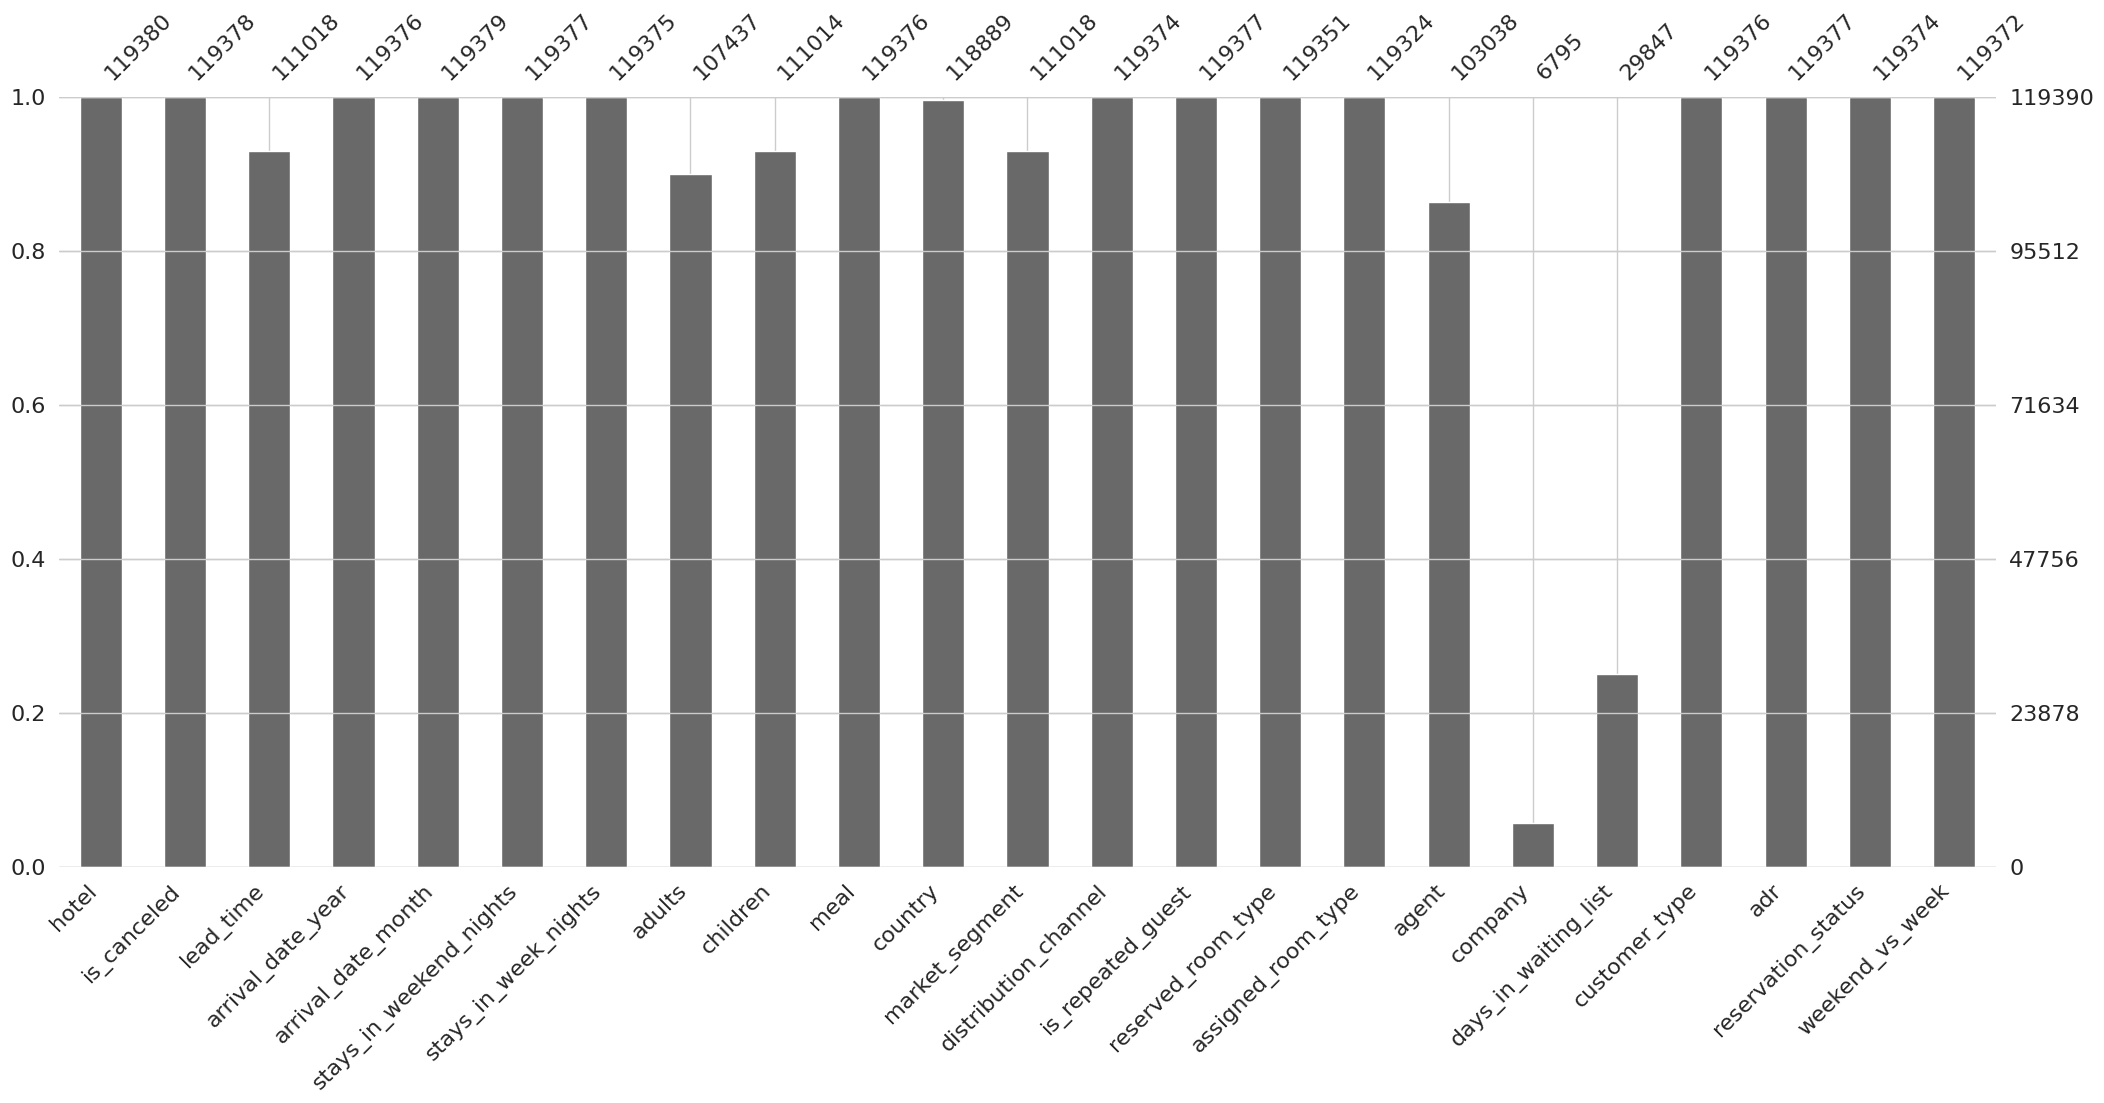

In [ ]:
#see the completeness of the data using mano.bar
mano.bar(df)

Most incomplete data is company, then days_in_waiting list, then assigned_room_type. We will drop days_in_waiting list because there is too little data present for it.

In [ ]:
df = df.drop(['days_in_waiting_list'], axis=1)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,...,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,agent,company,customer_type,adr,reservation_status,weekend_vs_week
0,Resort Hotel,0.0,342.0,2015.0,July,0.0,0.0,2.0,0.0,BB,...,Direct,0.0,C,C,NaN,NaN,Transient,0.0,Check-Out,0.0
1,Resort Hotel,0.0,737.0,2015.0,July,0.0,0.0,2.0,0.0,BB,...,Direct,0.0,C,C,NaN,NaN,Transient,0.0,Check-Out,0.0
2,Resort Hotel,0.0,7.0,2015.0,July,0.0,1.0,1.0,0.0,BB,...,Direct,0.0,A,C,NaN,NaN,Transient,75.0,Check-Out,-1.0
3,Resort Hotel,0.0,13.0,2015.0,July,0.0,1.0,1.0,0.0,BB,...,Corporate,0.0,A,NaN,304.0,NaN,Transient,75.0,Check-Out,-1.0
4,Resort Hotel,0.0,14.0,2015.0,July,0.0,2.0,2.0,0.0,BB,...,TA/TO,0.0,A,A,240.0,NaN,Transient,98.0,Check-Out,-2.0


In [ ]:
#remove rows where 70% or more of the columns have missing data as mentioned above in the start
df = df.dropna(thresh=df.shape[1] * 0.3)


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,...,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,agent,company,customer_type,adr,reservation_status,weekend_vs_week
0,Resort Hotel,0.0,342.0,2015.0,July,0.0,0.0,2.0,0.0,BB,...,Direct,0.0,C,C,NaN,NaN,Transient,0.0,Check-Out,0.0
1,Resort Hotel,0.0,737.0,2015.0,July,0.0,0.0,2.0,0.0,BB,...,Direct,0.0,C,C,NaN,NaN,Transient,0.0,Check-Out,0.0
2,Resort Hotel,0.0,7.0,2015.0,July,0.0,1.0,1.0,0.0,BB,...,Direct,0.0,A,C,NaN,NaN,Transient,75.0,Check-Out,-1.0
3,Resort Hotel,0.0,13.0,2015.0,July,0.0,1.0,1.0,0.0,BB,...,Corporate,0.0,A,NaN,304.0,NaN,Transient,75.0,Check-Out,-1.0
4,Resort Hotel,0.0,14.0,2015.0,July,0.0,2.0,2.0,0.0,BB,...,TA/TO,0.0,A,A,240.0,NaN,Transient,98.0,Check-Out,-2.0


<Axes: >

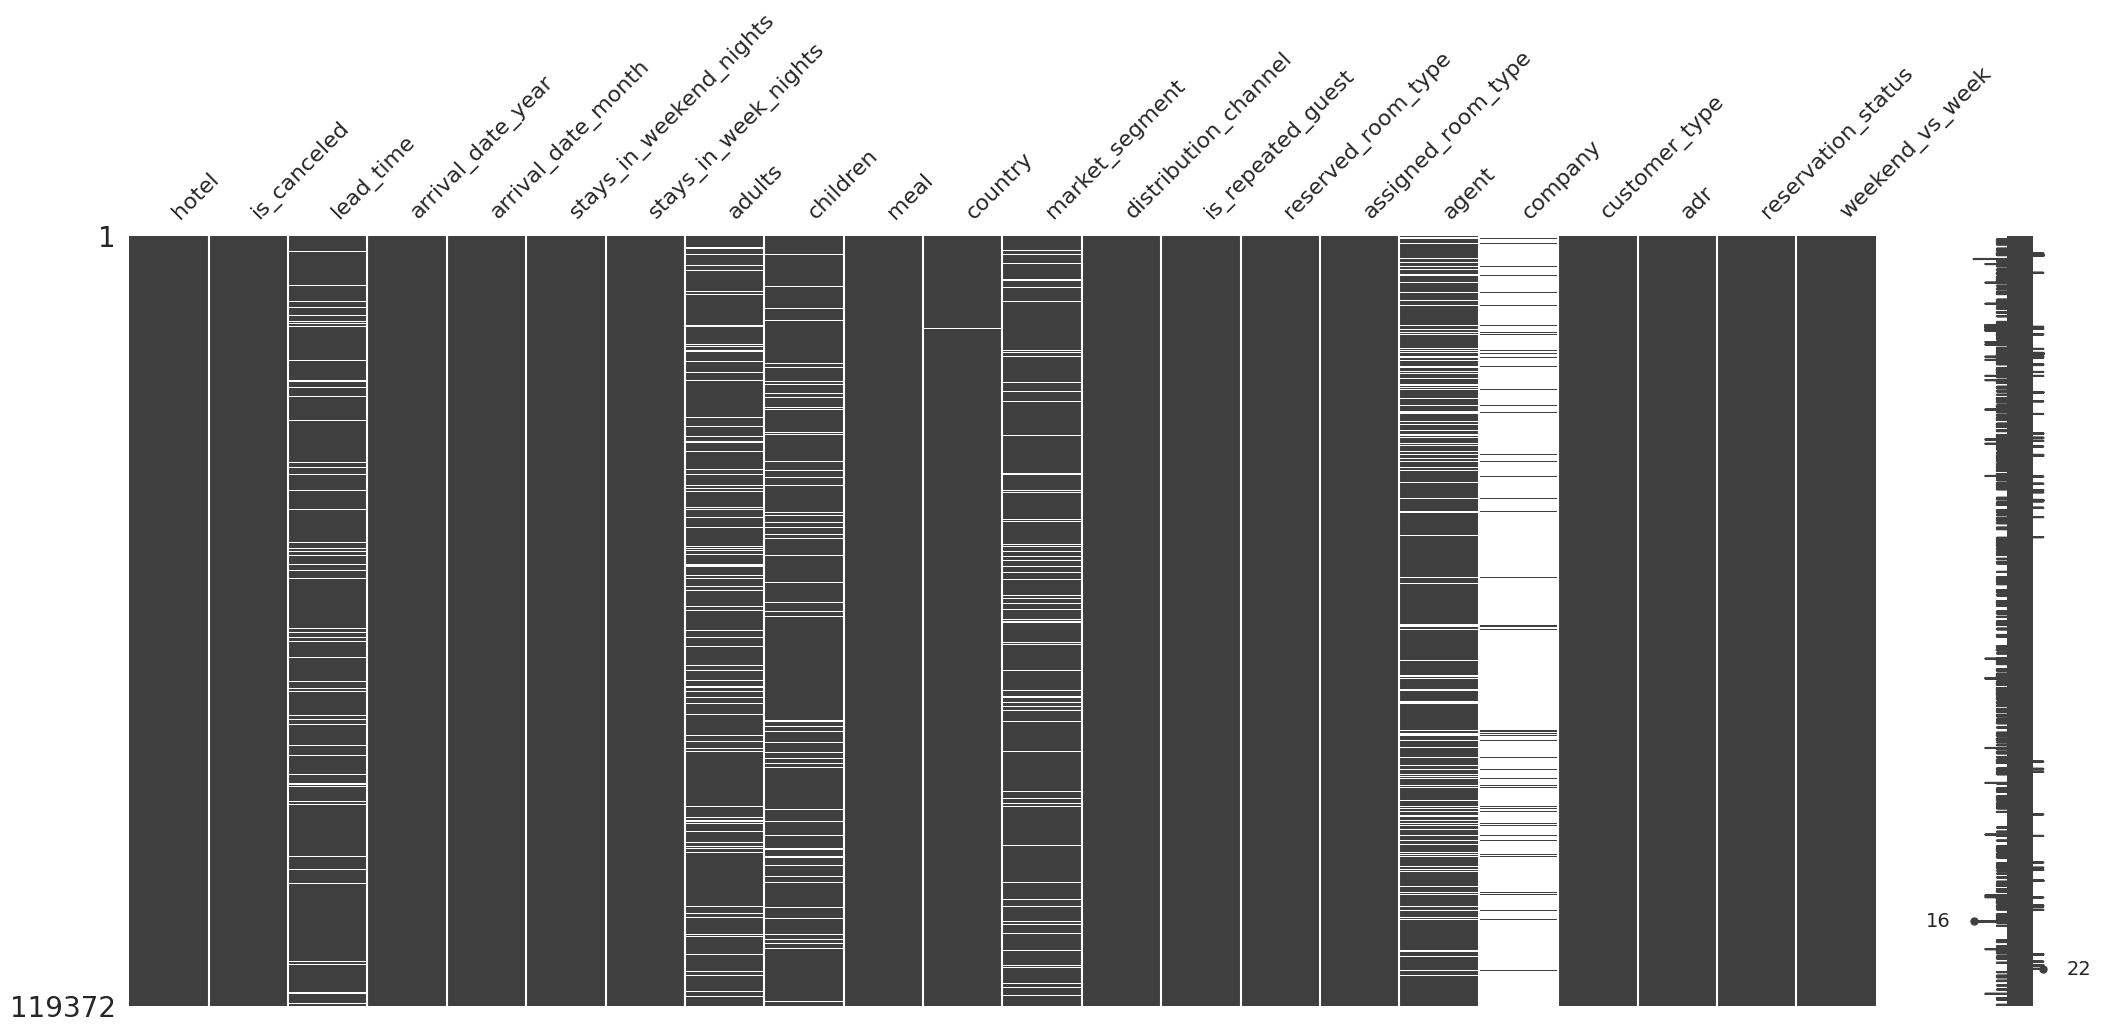

In [ ]:
mano.matrix(df)

Don't see similar patterns for any columns so none of them are an example of MNAR.

Next we'll be plotting the heatmap to determine the relationship (correlation) between missingness of columns

## Correlation Heatmap for Missing Values

<Axes: >

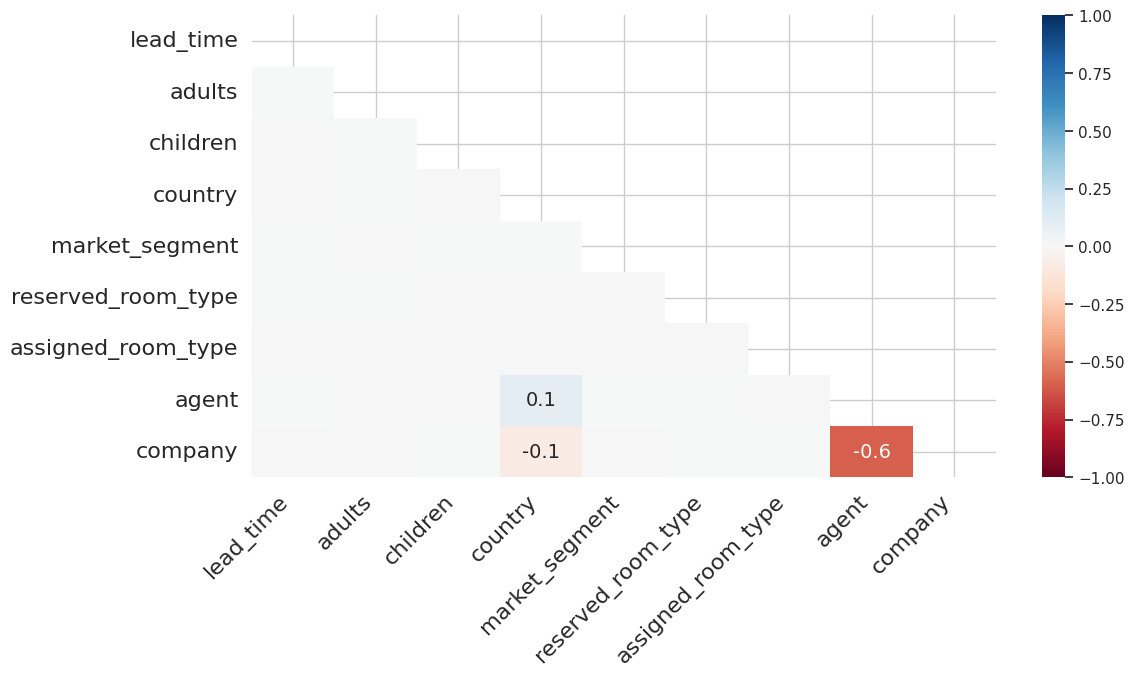

In [ ]:
mano.heatmap(df, figsize=(12,6))

**MAR**

*   company (strongly correlated with agent)
*   agent (strongly correlated with company)
*   distribution_channel (strongly correlated with market_segment and reservation_status)
*   market_segment (strongly correlated with distribution_channel and reservation_status)
*   reservation_status (strongly correlated with distribution_channel and market_segment)
*   customer type with market_segment and meal
*   meal with customer type




<Axes: >

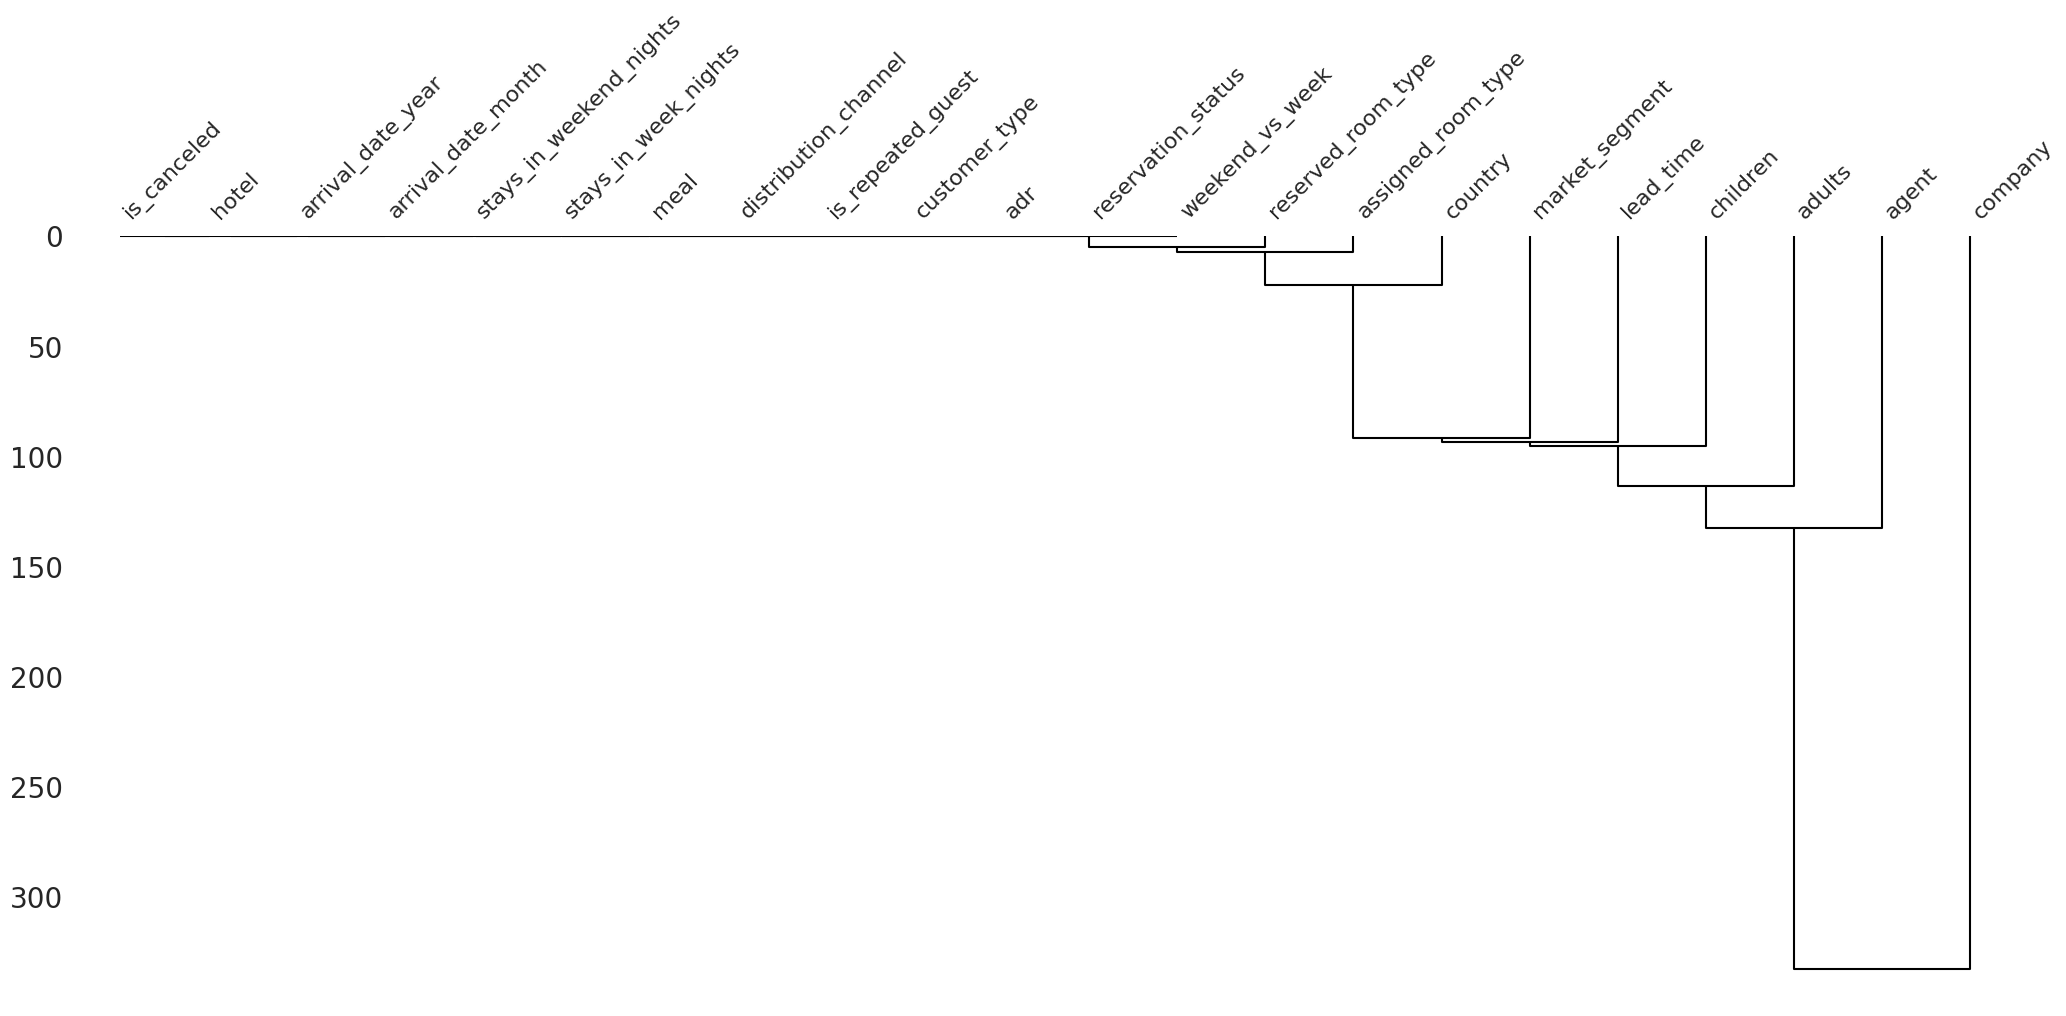

In [ ]:
#dendogram will quantify and cluster the missingness
mano.dendrogram(df)

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,8357
arrival_date_year,0
arrival_date_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,11936
children,8359
meal,0


**adr**, **customer_type**, **hotel**, **is_canceled**, **meal**, **stays_in_weekend_nights**,**stays_in_week_nights** have such few missing values thus we will fill them without using k-NN.

**children**, **adults**, **reserved_room_type**, and **assigned_room_type** will be filled in the same way as no correlation was found.

For categorical columns we will mostly be using mode to fill the missing values.

In [ ]:
df['reserved_room_type'].fillna(df['reserved_room_type'].mode()[0], inplace=True)

In [ ]:
df['assigned_room_type'].fillna(df['assigned_room_type'].mode()[0], inplace=True)

For columns '**agent**', '**company**', '**market_segment**', '**distribution_channel**', '**reservation_status**', '**customer_type**', '**country**' we will be using k-NN imputation

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
columns_to_impute = ['agent', 'company']
df_to_impute = df[columns_to_impute]

df_imputed = pd.DataFrame(imputer.fit_transform(df_to_impute), columns=columns_to_impute)

#replacing the original 'agent' and 'company' columns with the imputed values
df['agent'] = df_imputed['agent']
df['company'] = df_imputed['company']

Imputing agent and company in different cells because agent and company are taking too long

In [ ]:
#this is using mode only
#for rest of categoreical columns
columns_to_impute = ['market_segment', 'distribution_channel', 'reservation_status', 'customer_type', 'country' ,'meal', 'customer_type']
df_to_impute = df[columns_to_impute]

df_imputed = pd.DataFrame(imputer.fit_transform(pd.get_dummies(df_to_impute)), columns=pd.get_dummies(df_to_impute).columns)

for col in columns_to_impute:
  if col in df_imputed.columns:
    df[col] = df_imputed[col]
  else:
      #incase column is not in imputed columns, find the most frequent value
      df[col].fillna(df[col].mode()[0], inplace=True)

Numerical columns imputed by k-NN: 'lead_time' and 'adr'

In [ ]:
columns_to_impute = ['lead_time', 'adr']
df_to_impute = df[columns_to_impute]

df_imputed = pd.DataFrame(imputer.fit_transform(df_to_impute), columns=columns_to_impute)

df['lead_time'] = df_imputed['lead_time']
df['adr'] = df_imputed['adr']

We will now fill missing values in these columns using the median

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,18
arrival_date_year,0
arrival_date_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,11936
children,8359
meal,0


In [ ]:
df['adults'].fillna(df['adults'].median(), inplace=True)

In [ ]:
df['stays_in_weekend_nights'].fillna(df['stays_in_weekend_nights'].median(), inplace=True)

In [ ]:
df['stays_in_week_nights'].fillna(df['stays_in_week_nights'].median(), inplace=True)

And we will fill missing values in 'children' column using the mean

In [ ]:
df['children'].fillna(df['children'].mean(), inplace=True)

Now to check if all the columns are full

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,18
arrival_date_year,0
arrival_date_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
meal,0


Removing all the left over rows with missing data in **lead_time**, **adr**, **agent**, **company**

In [ ]:
df.dropna(subset=['lead_time', 'adr', 'agent', 'company'], inplace=True)

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
meal,0


# Hypothesis Testing

In [ ]:
#!pip install statsmodels
#!pip install scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats

**Normality Testing**
Anova Tests assume that our data is normal (i.e symmetrical). We will perform normality testing to see if the data is normal otherwise Anova Test will give us incorrect results and insights. We will be using Kolmogoroc Smirnov Test.

In [ ]:
for column in ['lead_time', 'adr']:
  statistic, p_value = stats.kstest(df[column], 'norm')
  print(f"Kolmogorov-Smirnov test for {column}:")
  print(f"Statistic: {statistic:.4f}")
  print(f"P-value: {p_value:.4f}")
  if p_value > 0.05:
    print("The data in this column appears to be normally distributed.")
  else:
    print("The data in this column does not appear to be normally distributed.")
  print("-" * 20)

Kolmogorov-Smirnov test for lead_time:
Statistic: 0.9059
P-value: 0.0000
The data in this column does not appear to be normally distributed.
--------------------
Kolmogorov-Smirnov test for adr:
Statistic: 0.9832
P-value: 0.0000
The data in this column does not appear to be normally distributed.
--------------------


Using Anova Tests to see if there is atleast one significant difference between adr and hotel :




In [ ]:
model = ols('adr ~ C(hotel)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Average Daily Rate - Hotels")
print(anova_table)


Anova => Average Daily Rate - Hotels
                sum_sq        df            F         PR(>F)
C(hotel)  2.853513e+06       1.0  1127.764744  4.327564e-246
Residual  3.019889e+08  119352.0          NaN            NaN


Here we see that the P-value is significantly lesser than 0.05, almost 0. Since hotel has only two types (City Hotel & Resort Hotel) thus we can now say that both the hotels are significantly different from eachother in terms of their average daily rate.

Anova test between **average daily rate** and **distribution channels** :

In [ ]:
model = ols('adr ~ C(distribution_channel)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Average Daily Rate - Distribution Channel")
print(anova_table)


Anova => Average Daily Rate - Distribution Channel
                               sum_sq        df           F         PR(>F)
C(distribution_channel)  3.614920e+06       4.0  358.065826  4.895241e-307
Residual                 3.012275e+08  119349.0         NaN            NaN


The P-value is less than 0.05 hence significant difference. Now we will perform a tukey test to see what distribution channel has the most significant difference given the adr:

In [ ]:
tukey = pairwise_tukeyhsd(endog=df['adr'], groups=df['distribution_channel'], alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj    lower    upper  reject
------------------------------------------------------------
Corporate    Direct  21.3774    0.0   19.3536 23.4012   True
Corporate       GDS  31.2846    0.0   21.2787 41.2906   True
Corporate     TA/TO  23.9387    0.0   22.2052 25.6722   True
Corporate Undefined  -6.7982 0.9982  -68.1072 54.5108  False
   Direct       GDS   9.9072 0.0508   -0.0219 19.8364  False
   Direct     TA/TO   2.5613    0.0     1.347  3.7756   True
   Direct Undefined -28.1756 0.7195  -89.4721 33.1209  False
      GDS     TA/TO  -7.3459 0.2518    -17.22  2.5281  False
      GDS Undefined -38.0828 0.4505 -100.1576  23.992  False
    TA/TO Undefined -30.7369 0.6482  -92.0245 30.5507  False
------------------------------------------------------------


The result of this tukey test shows that except for the corporate and undefined group combination, the rest of the groups with corporate and direct and TA/TO group  are rejected which means that the null hypothesis, that is that the means are equal, is rejected meaning that there is a significant difference in adr between these groups. Thus this can be interpreted with surity that corporate channel earns the most average daily rate followed by direct channel.

Anova test between **adults** and **meal** type:

In [ ]:
model = ols('adults ~ C(meal)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Adults - Meal")
print(anova_table)


Anova => Adults - Meal
                sum_sq        df          F        PR(>F)
C(meal)      70.422591       5.0  48.773027  1.285126e-50
Residual  34464.932805  119348.0        NaN           NaN


P-value < than 0.05 thus can proceed with Tukey test

In [ ]:
tukey = pairwise_tukeyhsd(endog=df['adults'], groups=df['meal'], alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
     BB        FB   0.1055    0.0  0.0478  0.1633   True
     BB        HB   0.0744    0.0  0.0599  0.0888   True
     BB   Invalid   0.0146 0.0618 -0.0004  0.0296  False
     BB        SC   0.0023 0.9986 -0.0142  0.0189  False
     BB Undefined  -0.0174 0.8989 -0.0643  0.0296  False
     FB        HB  -0.0312 0.6616 -0.0902  0.0279  False
     FB   Invalid   -0.091 0.0002 -0.1501 -0.0318   True
     FB        SC  -0.1032    0.0 -0.1628 -0.0436   True
     FB Undefined  -0.1229    0.0  -0.197 -0.0489   True
     HB   Invalid  -0.0598    0.0 -0.0792 -0.0404   True
     HB        SC   -0.072    0.0 -0.0926 -0.0514   True
     HB Undefined  -0.0918    0.0 -0.1403 -0.0432   True
Invalid        SC  -0.0122  0.558 -0.0332  0.0088  False
Invalid Undefined   -0.032 0.4203 -0.0807  0.0167  False
     SC Undefined  -0.0197 0.86

Since BB meal has the highest mean difference with both FB and HB thus customers with more adults can be recommended this meal type more. FB is showing significant difference with all meal types hence adults do not go for this meal type that much.

In [ ]:
model = ols('children ~ C(meal)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Children - Meal")
print(anova_table)


Anova => Children - Meal
                sum_sq        df           F         PR(>F)
C(meal)      83.102625       5.0  105.474955  1.745432e-111
Residual  18806.610619  119348.0         NaN            NaN


In [ ]:
tukey = pairwise_tukeyhsd(endog=df['children'], groups=df['meal'], alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
     BB        FB  -0.0047 0.9996 -0.0473   0.038  False
     BB        HB   0.0128 0.0082  0.0021  0.0234   True
     BB   Invalid  -0.0184    0.0 -0.0295 -0.0074   True
     BB        SC  -0.0926    0.0 -0.1048 -0.0804   True
     BB Undefined  -0.0548 0.0001 -0.0895 -0.0201   True
     FB        HB   0.0174 0.8649 -0.0262  0.0611  False
     FB   Invalid  -0.0138 0.9472 -0.0575    0.03  False
     FB        SC  -0.0879    0.0 -0.1319 -0.0439   True
     FB Undefined  -0.0501 0.0942 -0.1048  0.0046  False
     HB   Invalid  -0.0312    0.0 -0.0455 -0.0169   True
     HB        SC  -0.1054    0.0 -0.1206 -0.0901   True
     HB Undefined  -0.0676    0.0 -0.1034 -0.0317   True
Invalid        SC  -0.0741    0.0 -0.0896 -0.0586   True
Invalid Undefined  -0.0364 0.0457 -0.0724 -0.0004   True
     SC Undefined   0.0378 0.03

The highest mean difference here is between SC and undefined meaning that customers with more children mostly opt for SC meal type and thus should be recommended this meal more.

Below we are performing Anova Test between lead time and market segment to find a signifcant difference of lead time between the groups of market segment.

In [ ]:
model = ols('lead_time ~ C(market_segment)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Lead Time - Market Segment")
print(anova_table)


Anova => Lead Time - Market Segment
                         sum_sq        df           F  PR(>F)
C(market_segment)  8.966896e+07       7.0  1248.68998     0.0
Residual           1.224327e+09  119346.0         NaN     NaN


P-value is lesser than 0.05 hence proceeding to tukey test

In [ ]:
tukey = pairwise_tukeyhsd(endog=df['lead_time'], groups=df['market_segment'], alpha=0.05)
print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------
     Aviation Complementary   -14.722 0.5798  -38.7334   9.2894  False
     Aviation     Corporate  -26.1326 0.0054   -47.569  -4.6962   True
     Aviation        Direct   -3.4589 0.9997  -24.6348  17.7171  False
     Aviation        Groups   81.5657    0.0   60.4593 102.6721   True
     Aviation Offline TA/TO   32.2145 0.0001   11.1302  53.2988   True
     Aviation     Online TA    15.082 0.3673   -5.9398  36.1037  False
     Aviation     Undefined  -24.4047    1.0 -242.4859 193.6765  False
Complementary     Corporate  -11.4106 0.1013   -23.874   1.0528  False
Complementary        Direct   11.2631 0.0848   -0.7467   23.273  False
Complementary        Groups   96.2877    0.0   84.4009 108.1746   True
Complementary Offline TA/TO   46.9365    0.0   35.0889  58.7841   True
Comple

Seeing the mean difference always showing Groups to be the smaller value significantly, we can say that Groups segment has the shortest lead time. Since hotels aim to increase or optimise the lead time so that they can prepare more in advance for the guest hence Corporate and Direct segments would be good to aim to increase lead time as they usually book a lot before the actual arrival date. For Groups (mainly segments with short lead times) can be the focus of promotions etc. as they do not take book in advance that well.

T-test between **average daily rate** and **is_repeated_guest** to figure out the adr difference between a guest who has previously booked a room in a hotel and a guest who hasn't:

In [ ]:
t_val, p_val = stats.ttest_ind(df['adr'], df['is_repeated_guest'])
print("(Avg Daily Rate , Is Repeated Guest) => t-value=%s, p-value=%s" % (str(t_val), str(p_val)))

(Avg Daily Rate , Is Repeated Guest) => t-value=695.8685804283155, p-value=0.0


The high t-val of 695.85 means that there is a very huge difference between repeated and non repeated guests and thus the p-val is less that 0.05 thus we reject the null hypothesis of the mean being equal. Thus this means that repeated guests increase the adr and so we can implement strategies such as loyalty cards or discounts etc. for repeated guests that will in return increase the adr.

Now applying chi-square test for categorical columns **hotel** and **is_canceled** which will let us know the dependency between these two columns

In [ ]:
data_crosstab = pd.crosstab(df['hotel'], df['is_canceled'], margins = False)
data_crosstab

is_canceled,0.0,1.0
hotel,,
City Hotel,46200,33098
Resort Hotel,28935,11121


In [ ]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[49919.19189973 29378.80810027]
 [25215.80810027 14840.19189973]]
significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
df.groupby('hotel')['is_canceled'].mean() * 100 #cancellation rate

,is_canceled
hotel,
City Hotel,41.738758
Resort Hotel,27.763631


Since we reject the null hypothesis thus it is confirmed that hotel and is_canceled are dependent on eachother and have siginficant association between them.

By comparing these two we can now compare the strategies applied in Resort Hotel to City Hotel as Resort Hotel does a better job by providing services etc. as their cancellation rate is almost half of City Hotel's cancellation rate.

Chi-square test between **arrival_date_month** and **customer_type**:

In [ ]:
data_crosstab = pd.crosstab(df['arrival_date_month'], df['customer_type'], margins = False)
data_crosstab

customer_type,Contract,Group,Transient,Transient-Party,Unknown
arrival_date_month,,,,,
January,21,34,4322,929,622
February,45,47,5738,1428,809
March,55,38,6977,1783,938
April,147,28,7766,2067,1080
May,236,46,8175,2168,1163
June,289,35,7884,1622,1106
July,484,21,8818,2065,1271
August,616,57,9447,2341,1396
September,744,51,5804,2863,1045


In [ ]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=44
[[ 181.43492468   26.52237881 4006.76655998 1123.42637867  589.84975786]
 [ 246.9020812    36.09244768 5452.5279756  1528.79227341  802.68522211]
 [ 299.66756875   43.80577107 6617.78869581 1855.51074116  974.22722322]
 [ 339.36411013   49.60865995 7494.43785713 2101.30763946 1103.28173333]
 [ 360.78861203   52.7405198  7967.57156023 2233.96595003 1172.93335791]
 [ 334.71193257   48.92859896 7391.70025303 2072.50183488 1088.15738057]
 [ 387.44681368   56.63744826 8556.28506795 2399.03079076 1259.59987935]
 [ 424.11331836   61.99740268 9366.01960554 2626.06601371 1378.8036597 ]
 [ 321.58177355   47.00921628 7101.73688356 1991.20124168 1045.47088493]
 [ 341.53716675   49.92632002 7542.42713273 2114.76298239 1110.34639811]
 [ 207.94009417   30.39693684 4592.10054125 1287.54366004  676.0187677 ]
 [ 207.51160414   30.33429965 4582.63786719 1284.89049383  674.62573521]]
significance=0.050, p=0.000
Dependent (reject H0)


The p-value being lesser than the significant value 0.05 shows that the arrival date month column and the customer types have a significant association between them. From our anaylsis above we have seen that August is the most occupied month but further we will now analyze that what customer type prefers what month.

In [ ]:
df.groupby('arrival_date_month')['customer_type'].value_counts(normalize=True)*100

arrival_date_month  customer_type  
January             Transient          72.908232
                    Transient-Party    15.671390
                    Unknown            10.492578
                    Group               0.573549
                    Contract            0.354251
February            Transient          71.129292
                    Transient-Party    17.701748
                    Unknown            10.028511
                    Group               0.582621
                    Contract            0.557828
March               Transient          71.259320
                    Transient-Party    18.210602
                    Unknown             9.580227
                    Contract            0.561740
                    Group               0.388112
April               Transient          70.039683
                    Transient-Party    18.641775
                    Unknown             9.740260
                    Contract            1.325758
                    Group               0.252525
May                 Transient          69.350187
                    Transient-Party    18.391585
                    Unknown             9.865965
                    Contract            2.002036
                    Group               0.390227
June                Transient          72.092173
                    Transient-Party    14.831748
                    Unknown            10.113387
                    Contract            2.642648
                    Group               0.320044
July                Transient          69.657951
                    Transient-Party    16.312505
                    Unknown            10.040288
                    Contract            3.823367
                    Group               0.165890
August              Transient          68.174930
                    Transient-Party    16.893989
                    Unknown            10.074331
                    Contract            4.445407
                    Group               0.411344
September           Transient          55.239364
                    Transient-Party    27.248501
                    Unknown             9.945750
                    Contract            7.080994
                    Group               0.485391
October             Transient          55.892105
                    Transient-Party    27.789228
                    Unknown             9.624518
                    Contract            6.004122
                    Group               0.690026
November            Transient          69.149249
                    Transient-Party    16.735355
                    Unknown            10.509273
                    Contract            2.796585
                    Group               0.809538
December            Transient          70.884956
                    Transient-Party    16.445428
                    Unknown             9.705015
                    Contract            2.300885
                    Group               0.663717
Name: proportion, dtype: float64

For most of the part, transient customer are the largest group throughout all months. However in September and October they are 55% whereas in January and June these customer types are 72%.

Transient-Party customer type is the second largest group ranging from 27% in September and October to 14% in June.

Contract customer type is low over all but has a higher fluctuation that is it goes from 0.35% in Januray to 7% in September. Before October the Contract customer type rate is very low.

There is mainly one group that is almost stable throughout all months with a rate ranging between 9 to 10% that is Unknown customers. Group customers are always below 1% through out the year. They are more common in October and November.

By this we can say that fall month strategies, September and October, should be focused more towards group and contract customers, and winter months, January, February and December, should be focused more towards transient cutomers.

# Cluster Analysis

First we will apply PCA (Principal Component Analysis) to reduce the dimensionality of data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data = df.select_dtypes(include=['object'])

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(categorical_data), columns=encoder.get_feature_names_out(categorical_data.columns))

In [ ]:
categorical_encoded.shape

(119354, 219)

In [ ]:
numerical_data.shape

(119354, 12)

In [ ]:
#reset index used to ensure that both num and categ columns have the same row indices before getting concatenated
#this prevents from getting any nan rows (panda does it to align both num and cat dfs)
numerical_data = numerical_data.reset_index(drop=True)
categorical_encoded = categorical_encoded.reset_index(drop=True)


In [ ]:
#concatenating numerical and categorical columns into one dataframe
data = pd.concat([numerical_data, categorical_encoded], axis=1)

In [ ]:
data.shape

(119354, 231)

In [ ]:
data.isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
stays_in_weekend_nights,0
stays_in_week_nights,0
...,...
customer_type_Transient,0
customer_type_Transient-Party,0
customer_type_Unknown,0
reservation_status_Check-Out,0


In [ ]:
data.shape

(119354, 231)

Applying PCA now:

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

In [ ]:
principal_components

array([[ 4.76800685, -3.14565038],
       [ 4.23654156, -3.32687506],
       [ 3.18449509, -0.75195143],
       ...,
       [ 2.31144179,  1.67656484],
       [-0.79781773,  1.26415458],
       [-0.71133582,  0.79552462]])

In [ ]:
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

In [ ]:
pca_df.head()

,PC1,PC2
0,4.768007,-3.145650
1,4.236542,-3.326875
2,3.184495,-0.751951
3,2.234671,-1.872730
4,0.921794,1.187488


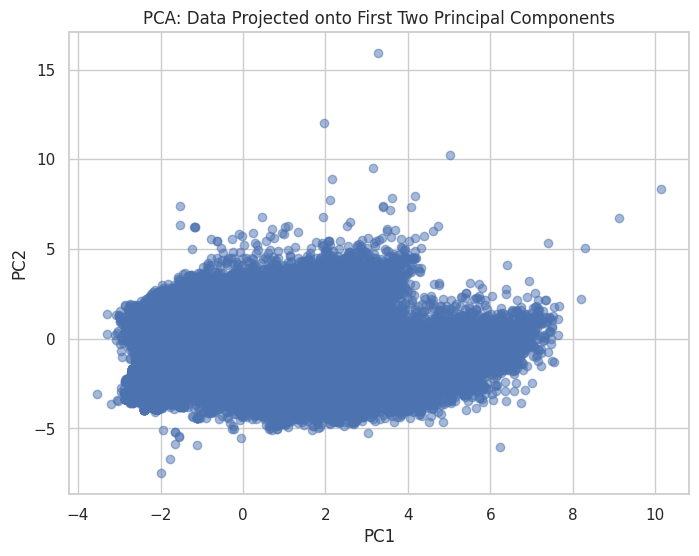

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA: Data Projected onto First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
pca_df.shape

(119354, 2)

Taking sub sample of pca dataframe so that we can see possible clusters and better the readability of the graph above as it is too jumbled.

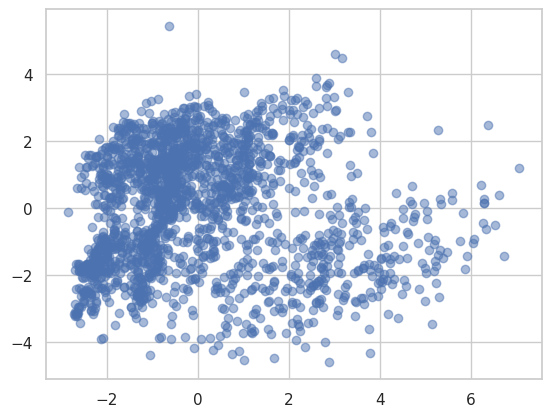

In [ ]:
pca_sample = pca_df.sample(2000)  # Take a random sample of 1000 points
plt.scatter(pca_sample['PC1'], pca_sample['PC2'], alpha=0.5)

Next we will perform clustering by color using KMeans

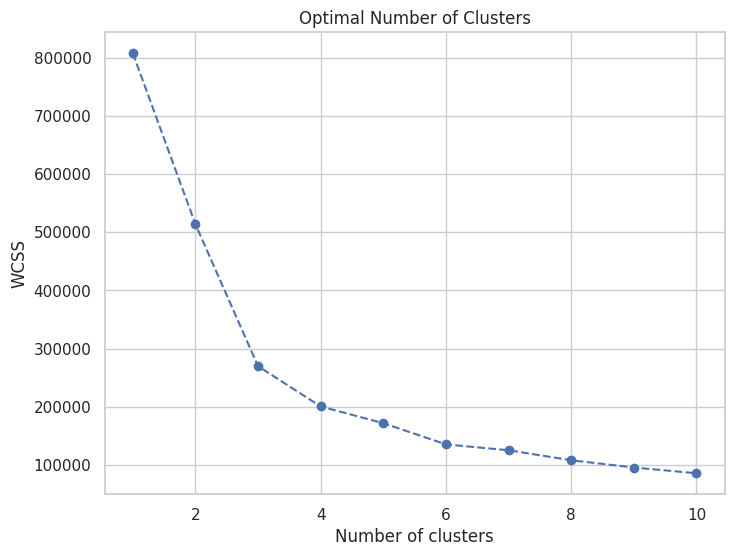

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

#running KMeans with different cluster numbers and calculating WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
print(wcss)

[807837.9468179216, 513877.06262003246, 269761.3867253797, 200641.4876544071, 171828.03803864022, 135391.24689903454, 125348.91685781111, 108111.85982088132, 95648.39817745889, 85788.56992399093]


Since the optimal number of clusters is where WCSS (within cluster sum of squares) starts to decrease at a slower rate hence from the array of wcss and the graph plotted above, it is visible that the point where wcss=265241.02041820384 and number of clusters=3 is optimal.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

In [ ]:
pca_df['Cluster'] = clusters
pca_df

,PC1,PC2,Cluster
0,4.768007,-3.145650,2
1,4.236542,-3.326875,2
2,3.184495,-0.751951,2
3,2.234671,-1.872730,2
4,0.921794,1.187488,1
...,...,...,...
119349,0.947997,1.485656,1
119350,2.830439,-0.419787,2
119351,2.311442,1.676565,1
119352,-0.797818,1.264155,1


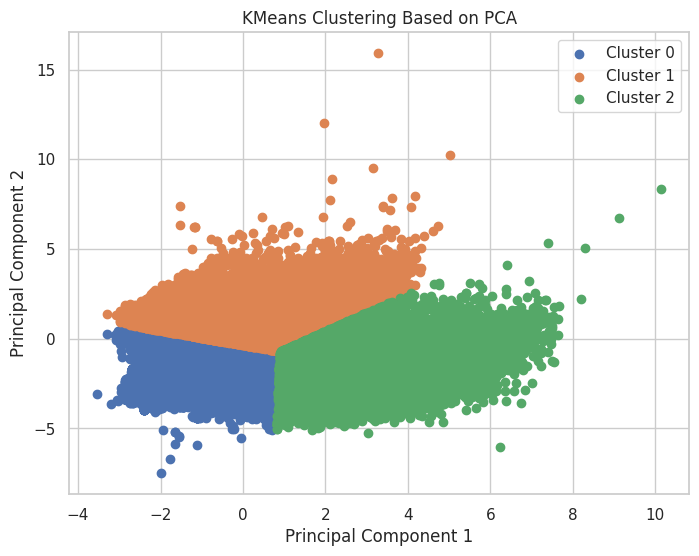

In [ ]:
plt.figure(figsize=(8,6))
for cluster in range(3):
    clustered_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(clustered_data['PC1'], clustered_data['PC2'], label=f'Cluster {cluster}')

plt.title('KMeans Clustering Based on PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Cluster 1 and Cluster 2 occupy more space relative to Cluster 0. Interestingly, Cluster 1 is overlapping slightly with the other clusters which may indicate that there is some simlarity (basically Cluster 1 might have some similar characteristics as the other 2 clusters). Most noticeable are the outliers for Cluster 1. The outliers have a much higher value for PC2 compared to the rest. Cluster 0 is more focused in the left side which shows that the points likely have low values of PC1 and normal (regular) values of PC2. Cluster 2 is focused and spread more towards the right. This shows that the points have higher values in PC1 but lower values in PC2.

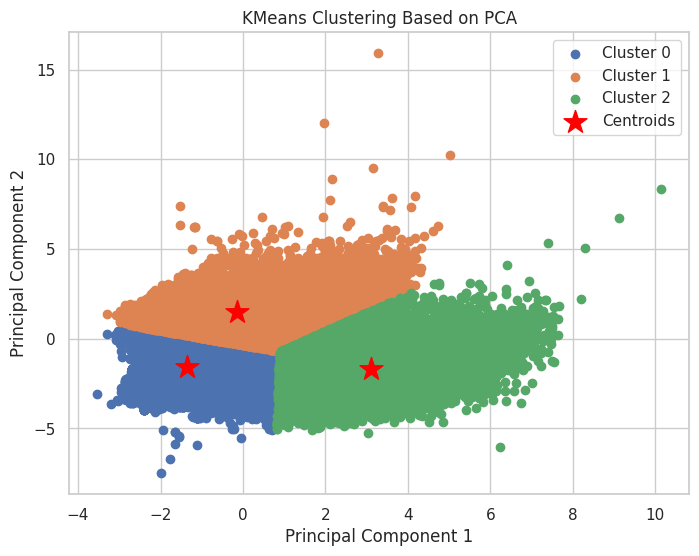

In [ ]:
import matplotlib.pyplot as plt

#cluster centers
centroids = kmeans.cluster_centers_
plt.figure(figsize=(8,6))

#diff color for each cluster
for cluster in range(3):
    clustered_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(clustered_data['PC1'], clustered_data['PC2'], label=f'Cluster {cluster}')

#red stars=centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='*', label='Centroids')

plt.title('KMeans Clustering Based on PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


The red stars are centroids which are mean points of the respective clusters. This will help us understand the average behaviour of the respective clusters.

For Radar chart, we will be focusing on the kpis (facts) which are:
lead time,adr,stays_in_weekend_nights, stays_in_week_nights.

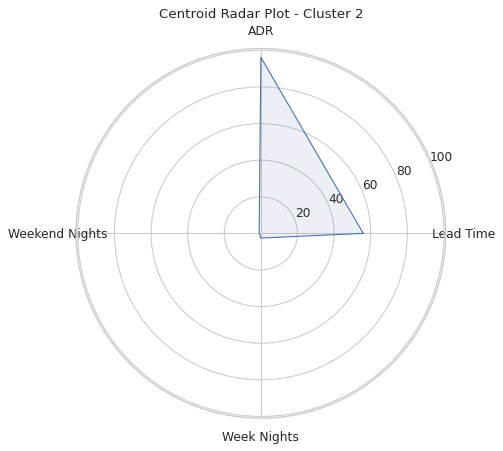

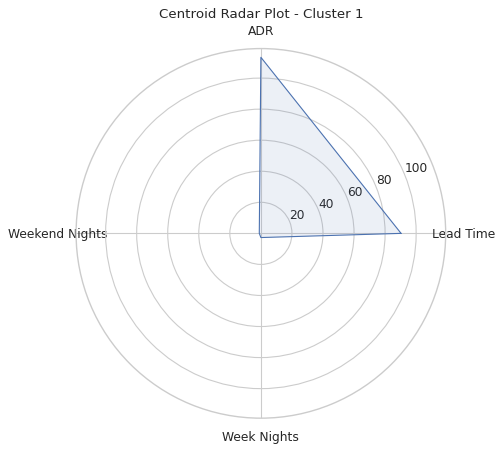

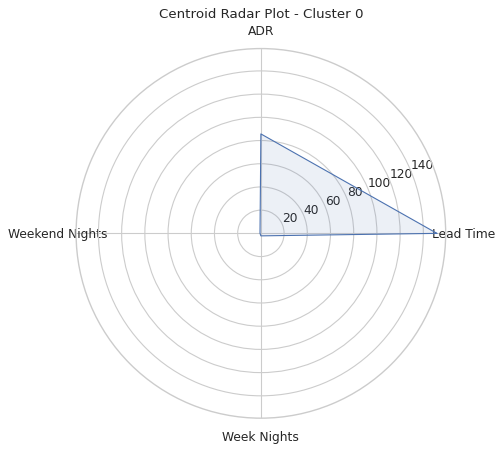

In [ ]:
def create_centroid_radar_plot(df, cluster_id):
  #df: The DataFrame containing the cluster assignments and feature values.
  #cluster_id: The ID of the cluster to plot.

  #get df for the specific cluster
  cluster_data = df[df['Cluster'] == cluster_id]

  #getting centroid
  centroid = cluster_data[['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights']].mean()

  #labels for radar chart
  labels = ['Lead Time', 'ADR', 'Weekend Nights', 'Week Nights']
  values = centroid.values.flatten().tolist()

  num_vars = len(labels)
  angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
  #closing circle
  values += values[:1]
  angles += angles[:1]

  plt.figure(figsize=(6, 6), dpi=80)
  ax = plt.subplot(111, polar=True)
  ax.plot(angles, values, linewidth=1, linestyle='solid')
  ax.fill(angles, values, 'b', alpha=0.1)
  ax.set_thetagrids(np.degrees(angles[:-1]), labels)
  plt.title(f'Centroid Radar Plot - Cluster {cluster_id}')
  plt.show()

#radar chart for each cluster
for cluster_id in pca_df['Cluster'].unique():
  create_centroid_radar_plot(pd.concat([pca_df, df], axis=1), cluster_id)

In Clusters 2 and 1, we have a high adr but not in cluster 0. Cluster 0 we have the highest lead time. The stays in weekend nights and week nights is the same and almost 0 for all the clusters so it is not really a primary consideration for us here. Cluster 0 represents those customers who pay high ADR and book in advance so indicating that they are willing to pay premium amounts and book considerably in advance. This type of customer could be attracted by luxurious trips for special events possibly. Cluster 1 represents customer who book a regular amout in advance, and pay a regular amount of adr. So these customers aren't willing to pay a premium amount like Cluster 0 and they also don't book last-minute. In Cluster 2, we have a small lead time indication that these customers don't book in advance and due to the adr, are willing to spend more than cluster 1 customers but not the premium amount of cluster 0.